In [1]:
!brew install asymptote.rb
%install_ext https://raw.github.com/jrjohansson/ipython-asymptote/master/asymptote.py
!pip install --upgrade --no-cache-dir pip
!pip install --upgrade --no-cache-dir graphviz
!pip install --upgrade --no-cache-dir pyparsing
!pip install --upgrade --no-cache-dir pydot
!pip install --upgrade --no-cache-dir Wand
!pip install --upgrade --no-cache-dir matplotlib
!pip install --upgrade --no-cache-dir pandas
!pip install --upgrade --no-cache-dir numexpr
!pip install --upgrade --no-cache-dir scipy
!brew install imagemagick

==> Downloading http://downloads.sourceforge.net/asymptote/asymptote-2.35.src.tg
Already downloaded: /Library/Caches/Homebrew/asymptote-2.35.tgz
==> ./configure --prefix=/usr/local/Cellar/asymptote/2.35 --enable-gc=/usr/local
==> make install
pdflatex asy-latex.dtx
make[1]: pdflatex: No such file or directory
make[1]: *** [asy-latex.pdf] Error 1
make: *** [sty] Error 2
make: *** Waiting for unfinished jobs....

READ THIS: https://git.io/brew-troubleshooting

Installed asymptote.py. To use it, type:
  %load_ext asymptote
Requirement already up-to-date: pip in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: graphviz in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pyparsing in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pydot in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pyparsing in /usr/local/lib/python2.7/site-packages (from pydot)
Requirement already up-to-date: setuptools in /usr/l

/usr/local/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [78]:
%reload_ext asymptote
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
import pydot
from wand.image import Image as WImage

<a id="fig:weltkugel"></a>
**Abbildung: Schematische Darstellung der Weltkugel**

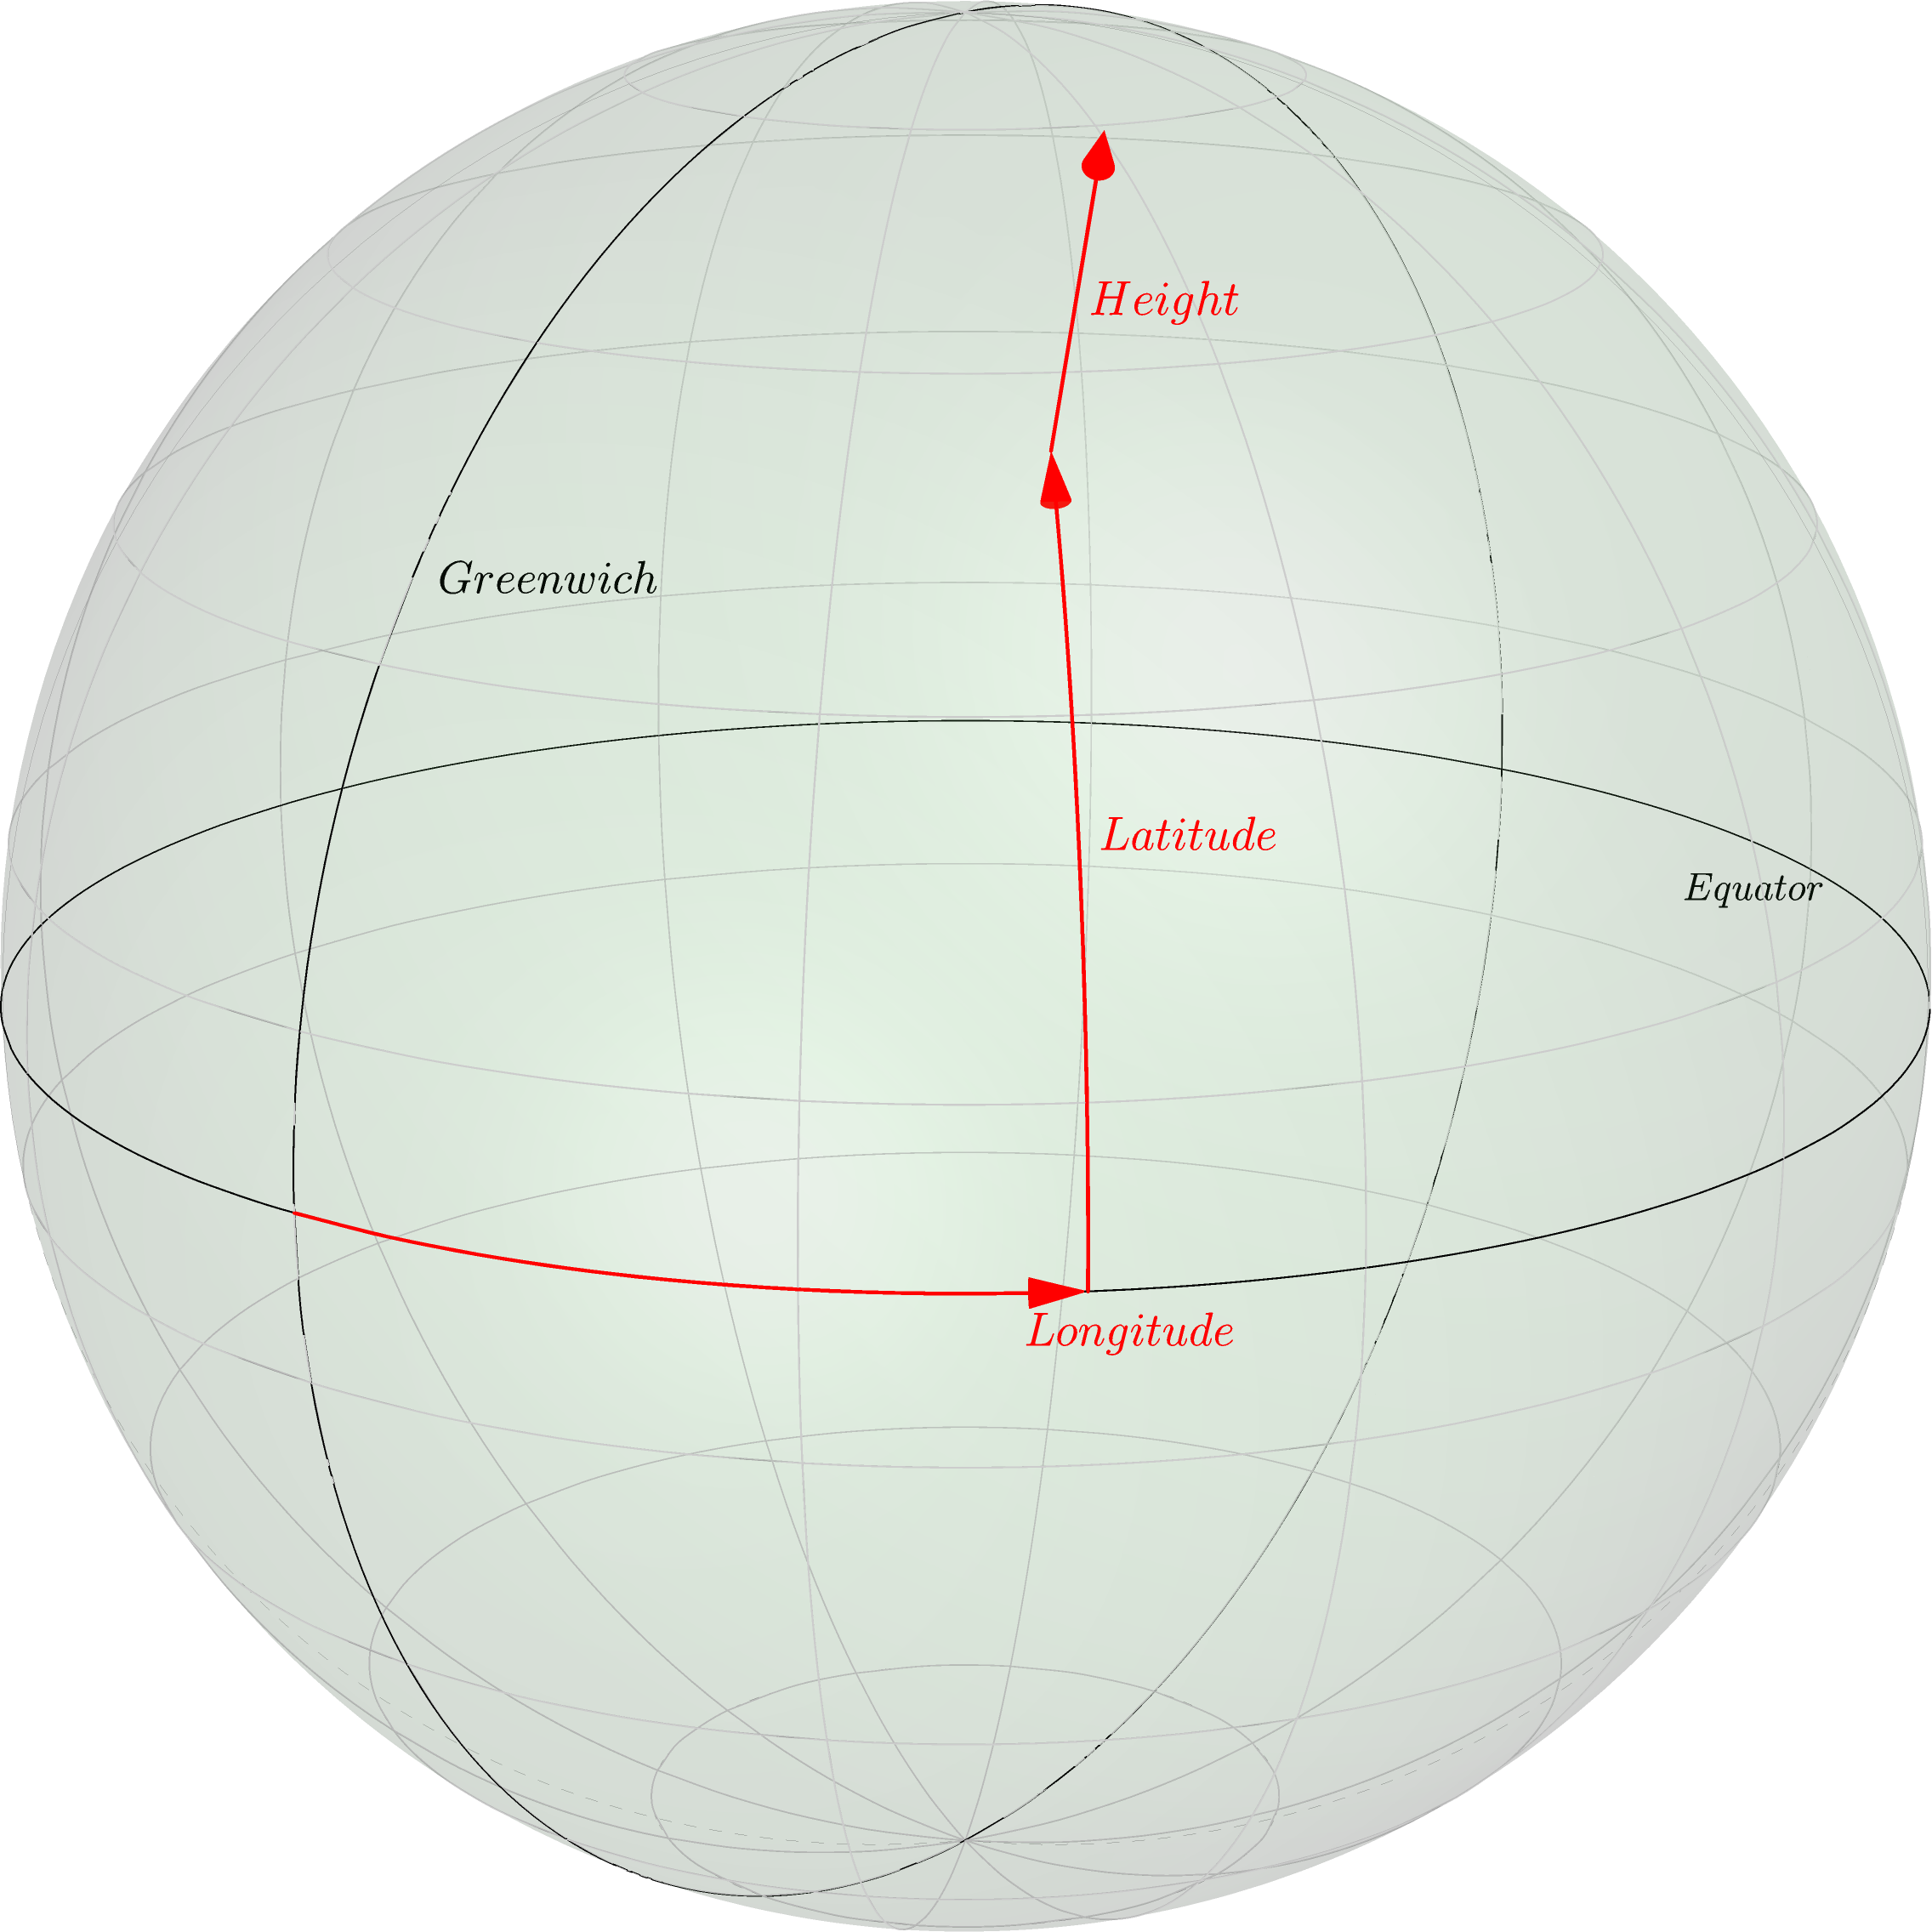

In [3]:
%%asy --root Images/world_coordinatesystem
settings.render = 4;
import three;
import graph3;
import solids;

size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

real RE = 1;
revolution Earth=sphere(O, RE, 9);

draw(surface(Earth),surfacepen=white+green+opacity(.1), meshpen=0.8*white + linewidth(0.5pt));
draw(Earth,m=10,0.6*white);

draw(rotate(-35,Y) * rotate(90,X) * path3(unitcircle), black, L=Label("$Greenwich$", position=EndPoint, align=(2,0)));
draw(rotate(-35,Z) * path3(unitcircle), black, L=Label("$Equator$", position=MidPoint, align=(-2,0)));

draw(rotate(45, Z) * rotate(45, Y) * (Z--1.5Z), red + linewidth(1.0pt), Arrow3(emissive(red)), L=Label("$Height$"));
draw(path3(arc((0,0),1,0,45)), red + linewidth(1.0pt), arrow=Arrow3(emissive(red)), L=Label("$Longitude$", position=EndPoint, align=(0.5,-1.5)));
draw(rotate(45,Z) * rotate(90,X) * path3(arc((0,0),1,0,45)), red + linewidth(1.0pt), arrow=Arrow3(emissive(red)), L=Label("$Latitude$", align=(1.5,1)));

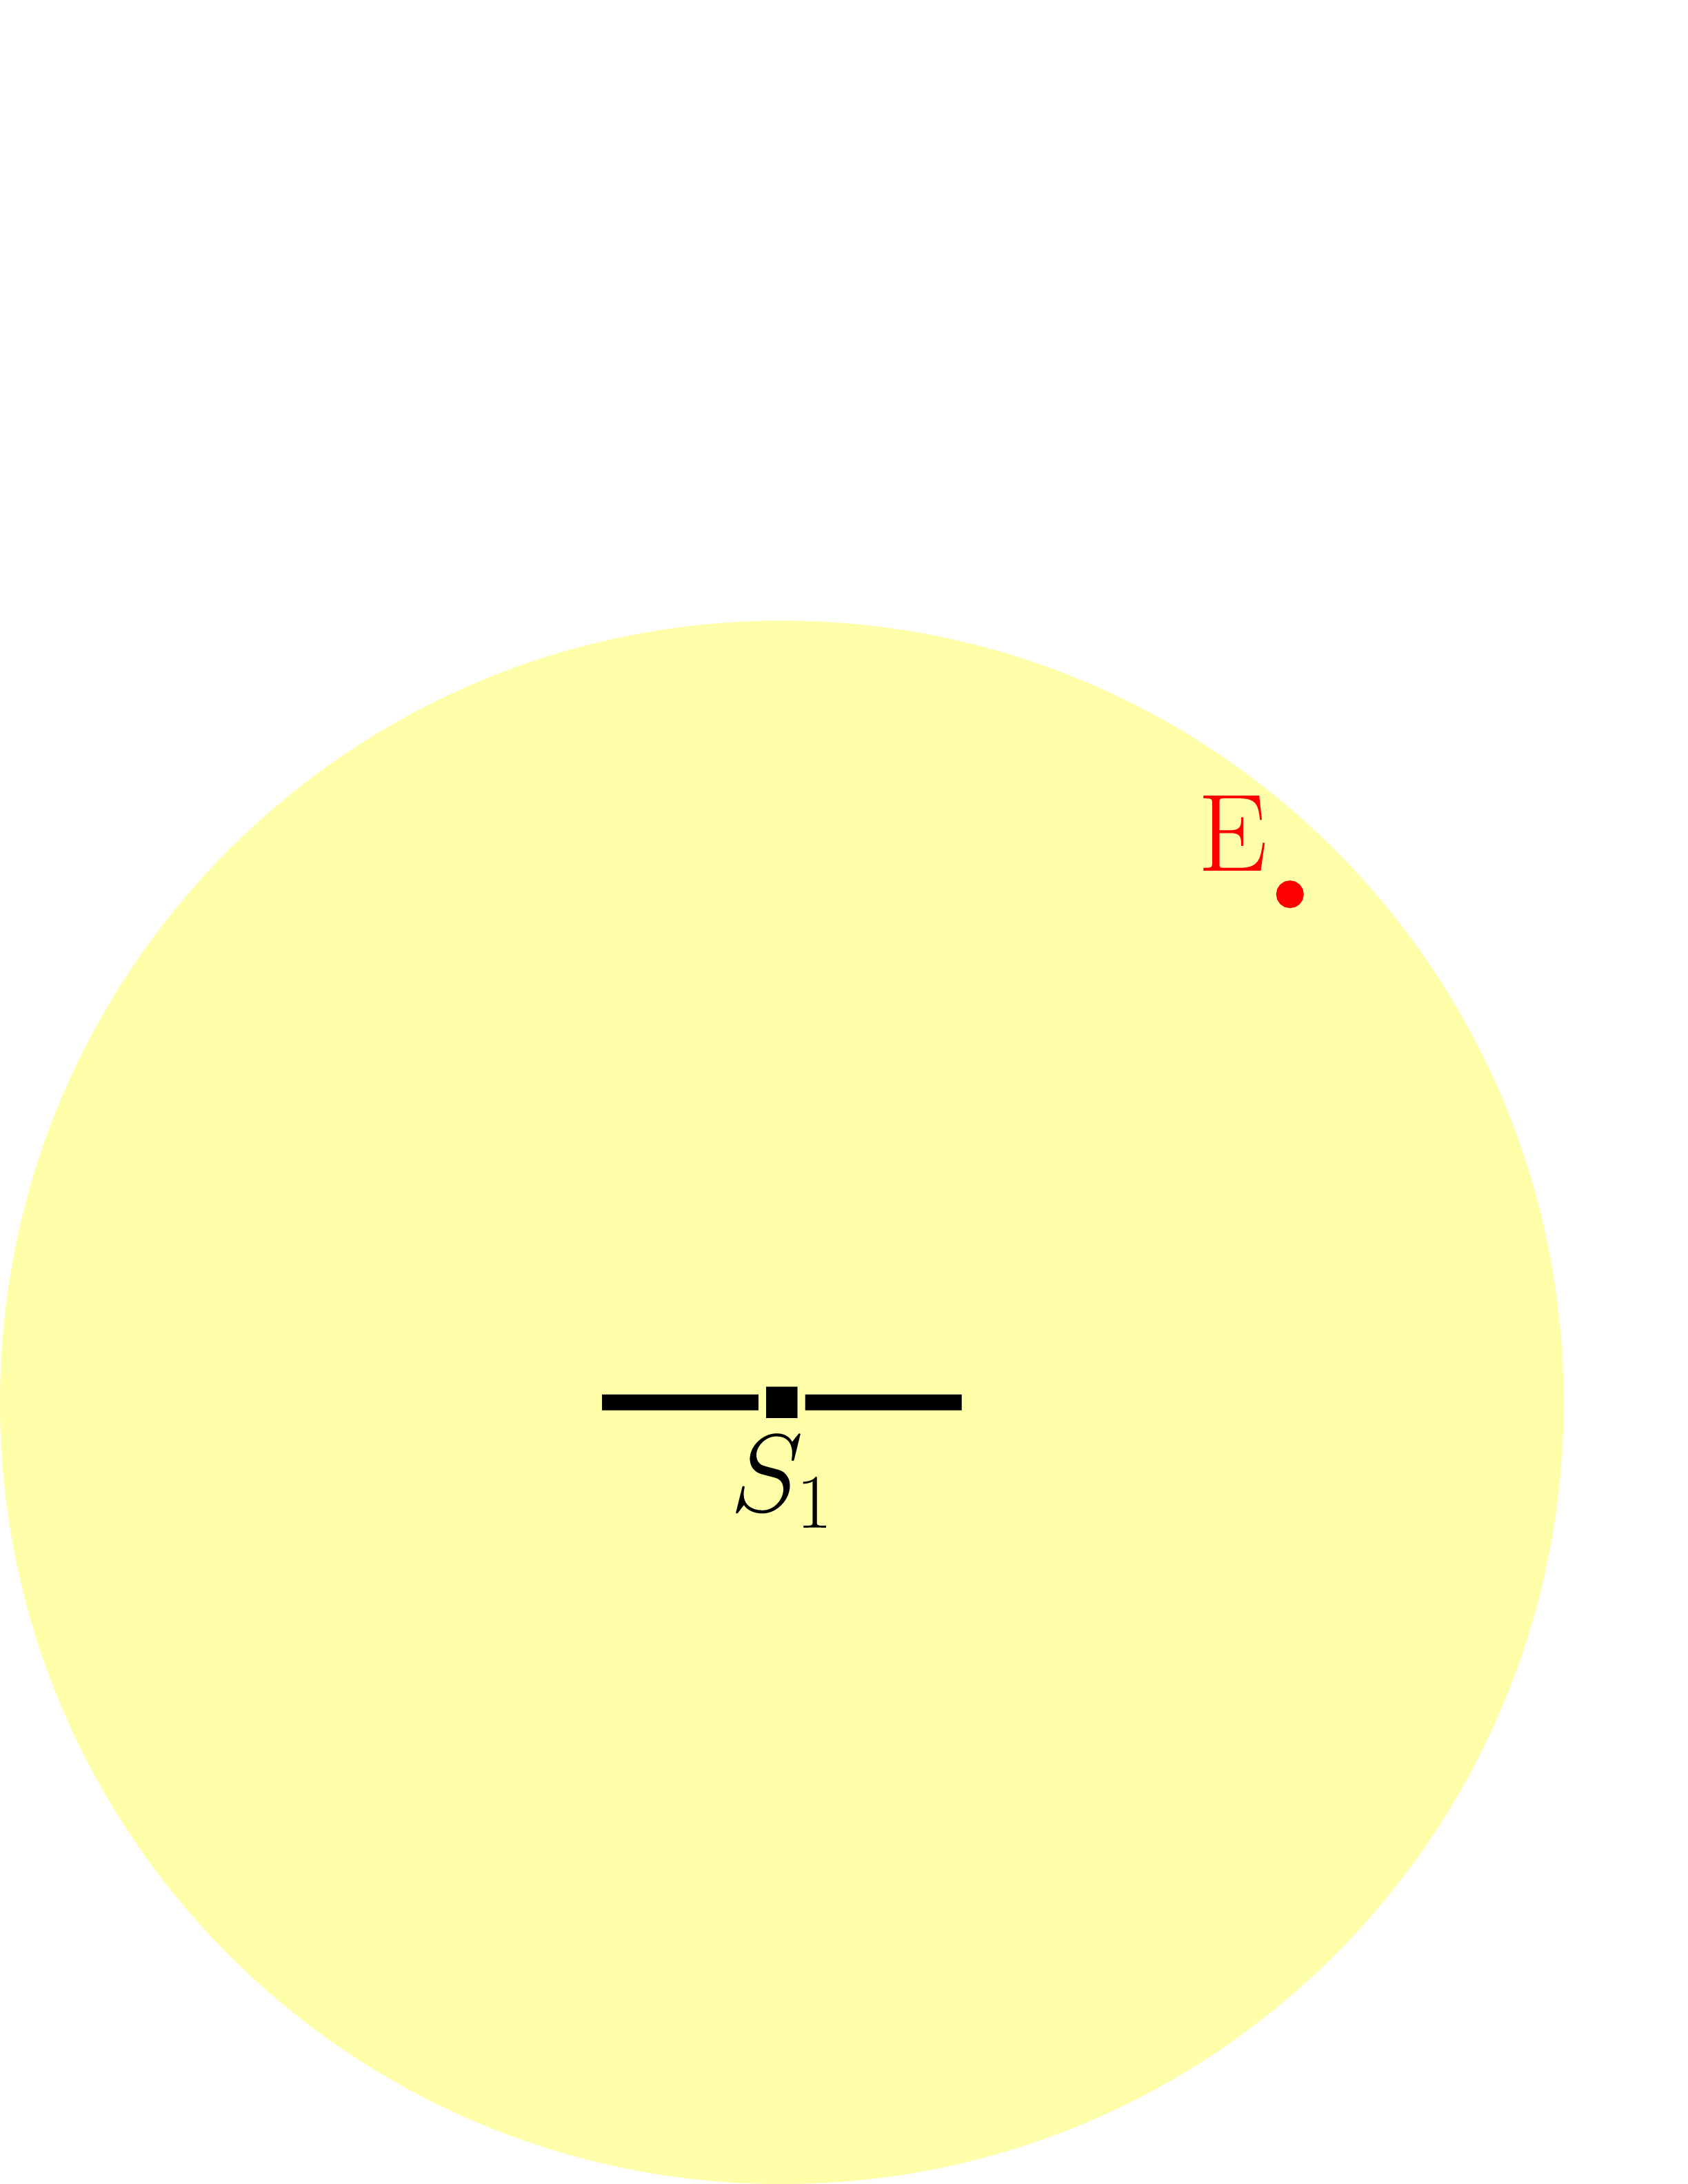

In [4]:
%%asy --root Images/gps_1_satellit
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
real r=1;
path s1_i=circle(z1,r);

fill(s1_i,lightred+lightgreen);
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
label("$S_1$",(0,0),S);

dot("E",(0.65,0.65),NW,red+10bp);

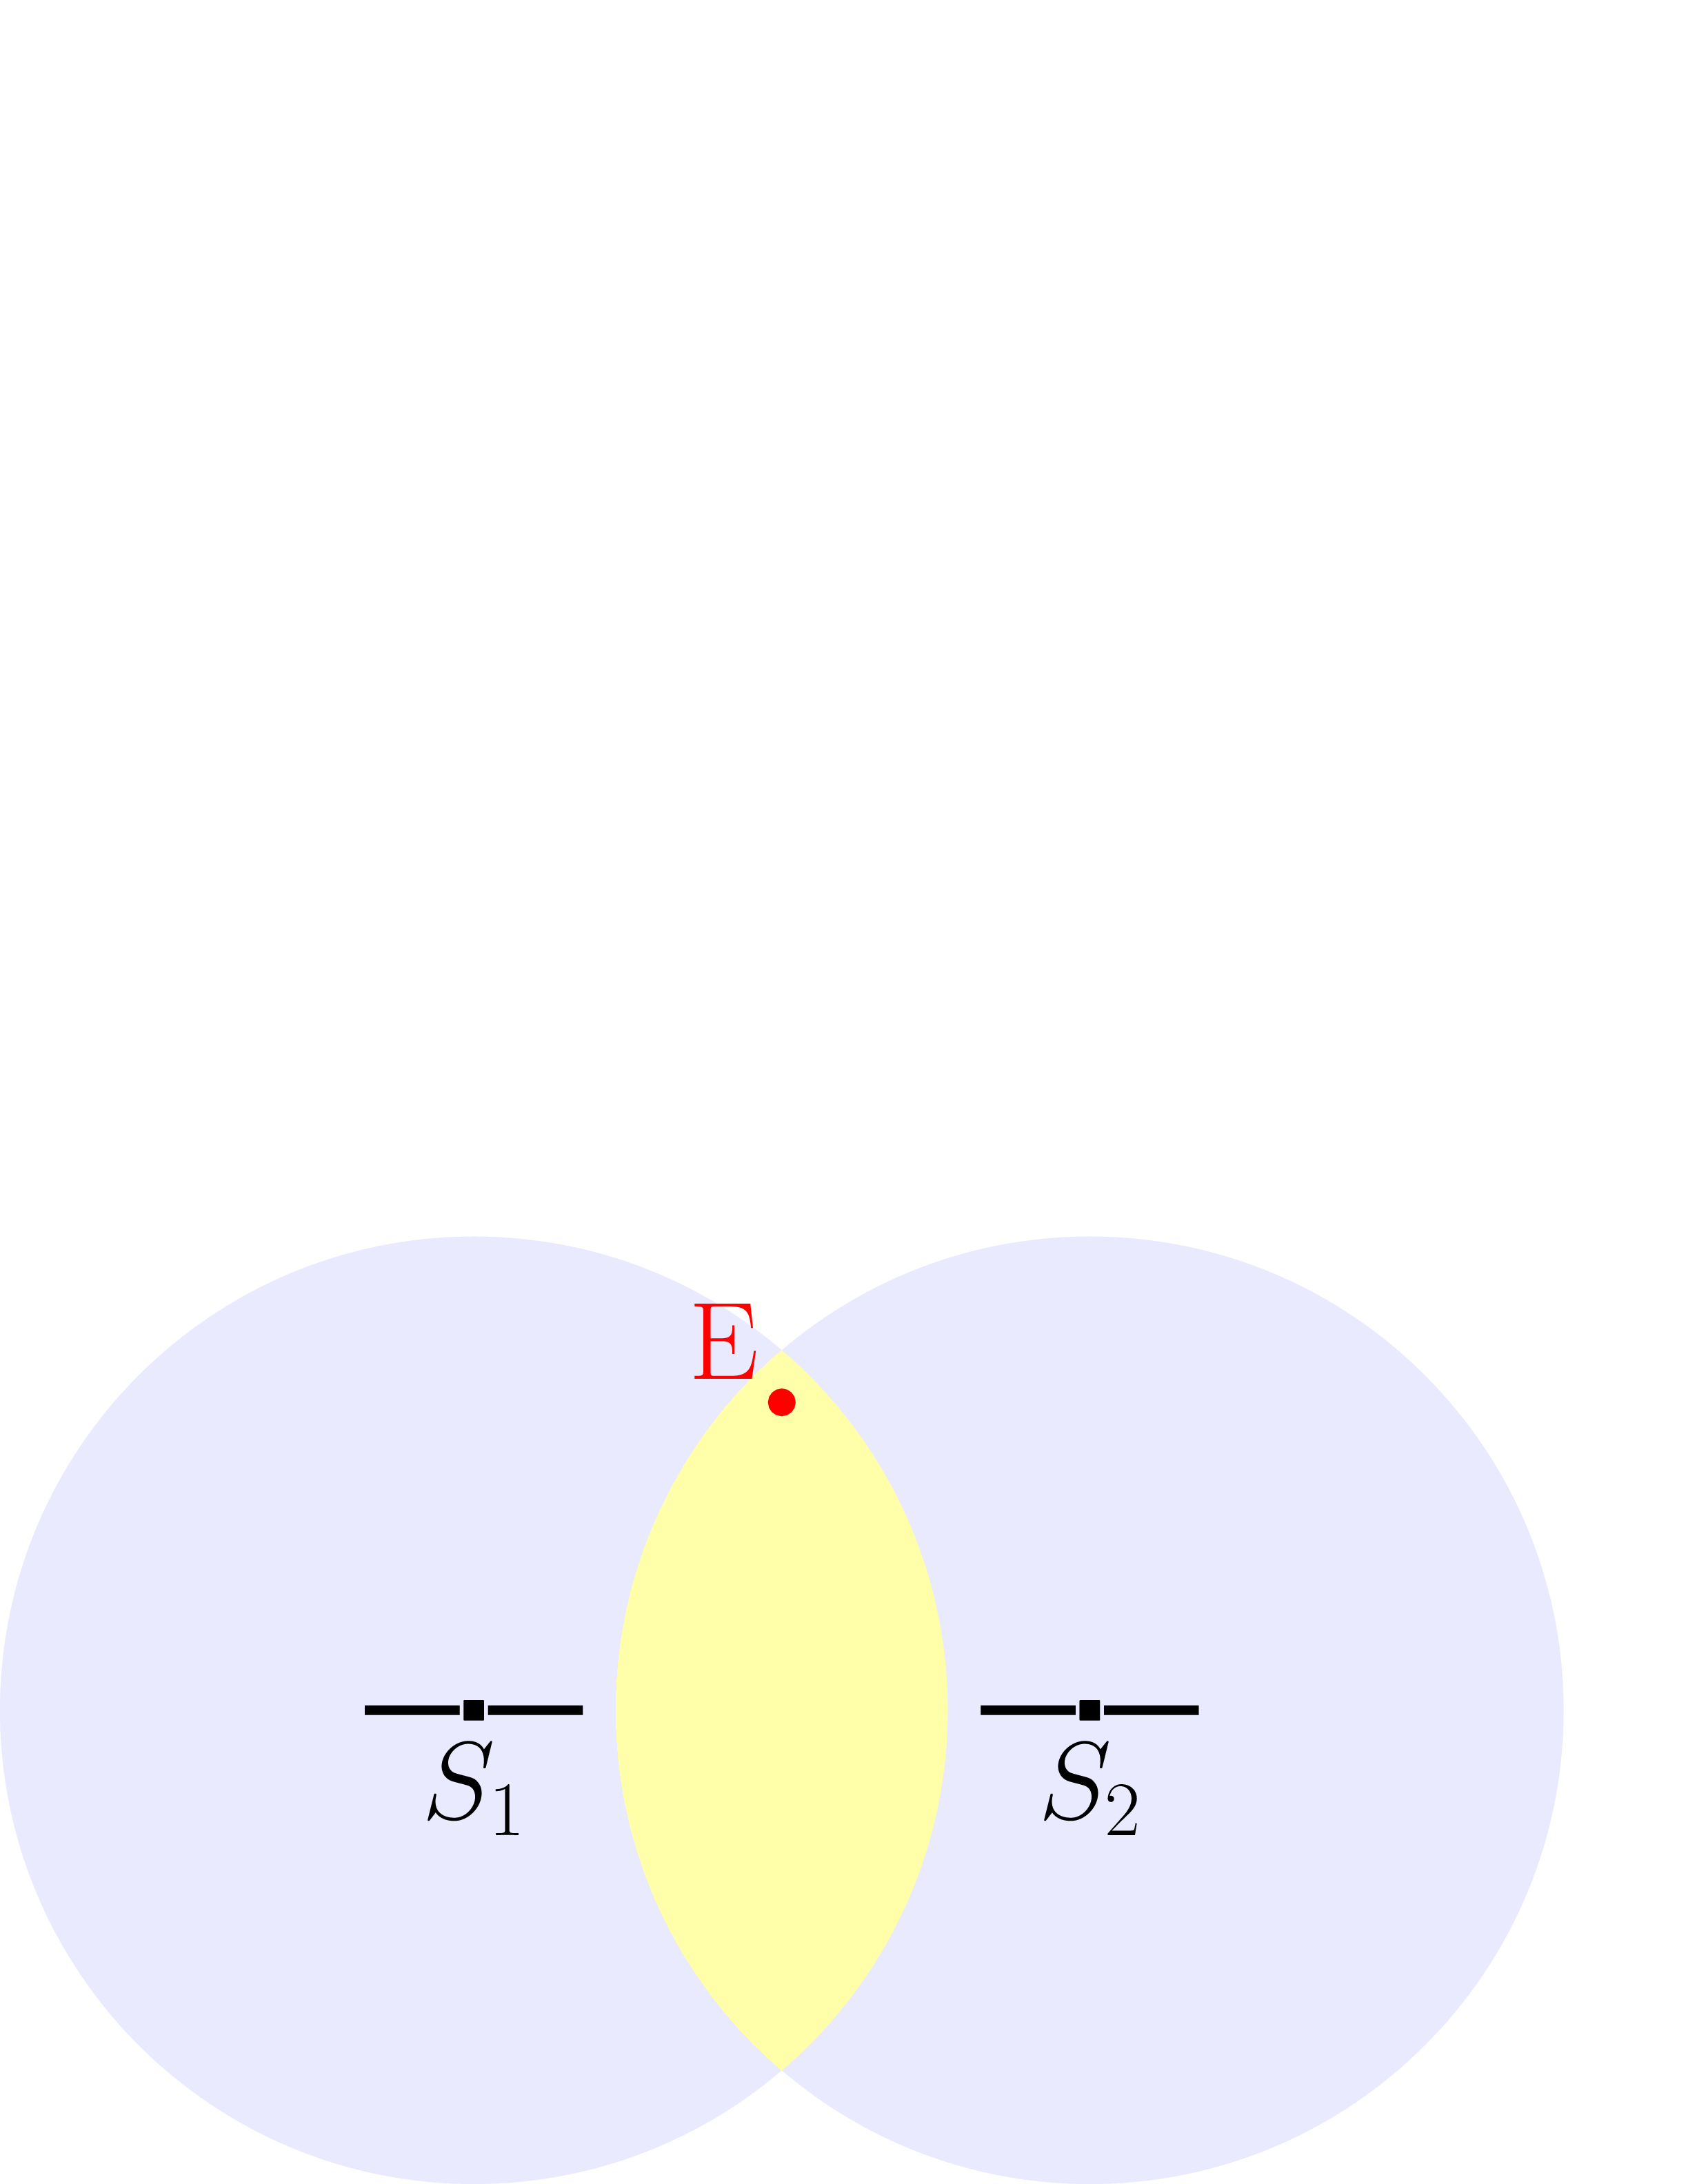

In [5]:
%%asy --root Images/gps_2_satelliten
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
pair z2=(1.3,0);
real r=1;
path s1=circle(z1,r);
path s2=circle(z2,r);

fill(s1, white+(lightblue*0.2));
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
draw(box((-0.02,-0.02),(0.02,0.02)));

fill(s2, white+(lightblue*0.2));
fill(shift(z2) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(z2) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));

picture intersection;
fill(intersection,s1,lightred+lightgreen);
clip(intersection,s2);
add(intersection);

label("$S_1$",z1,S);
label("$S_2$",z2,S);

dot("E",(0.65,0.65),NW,red+10bp);

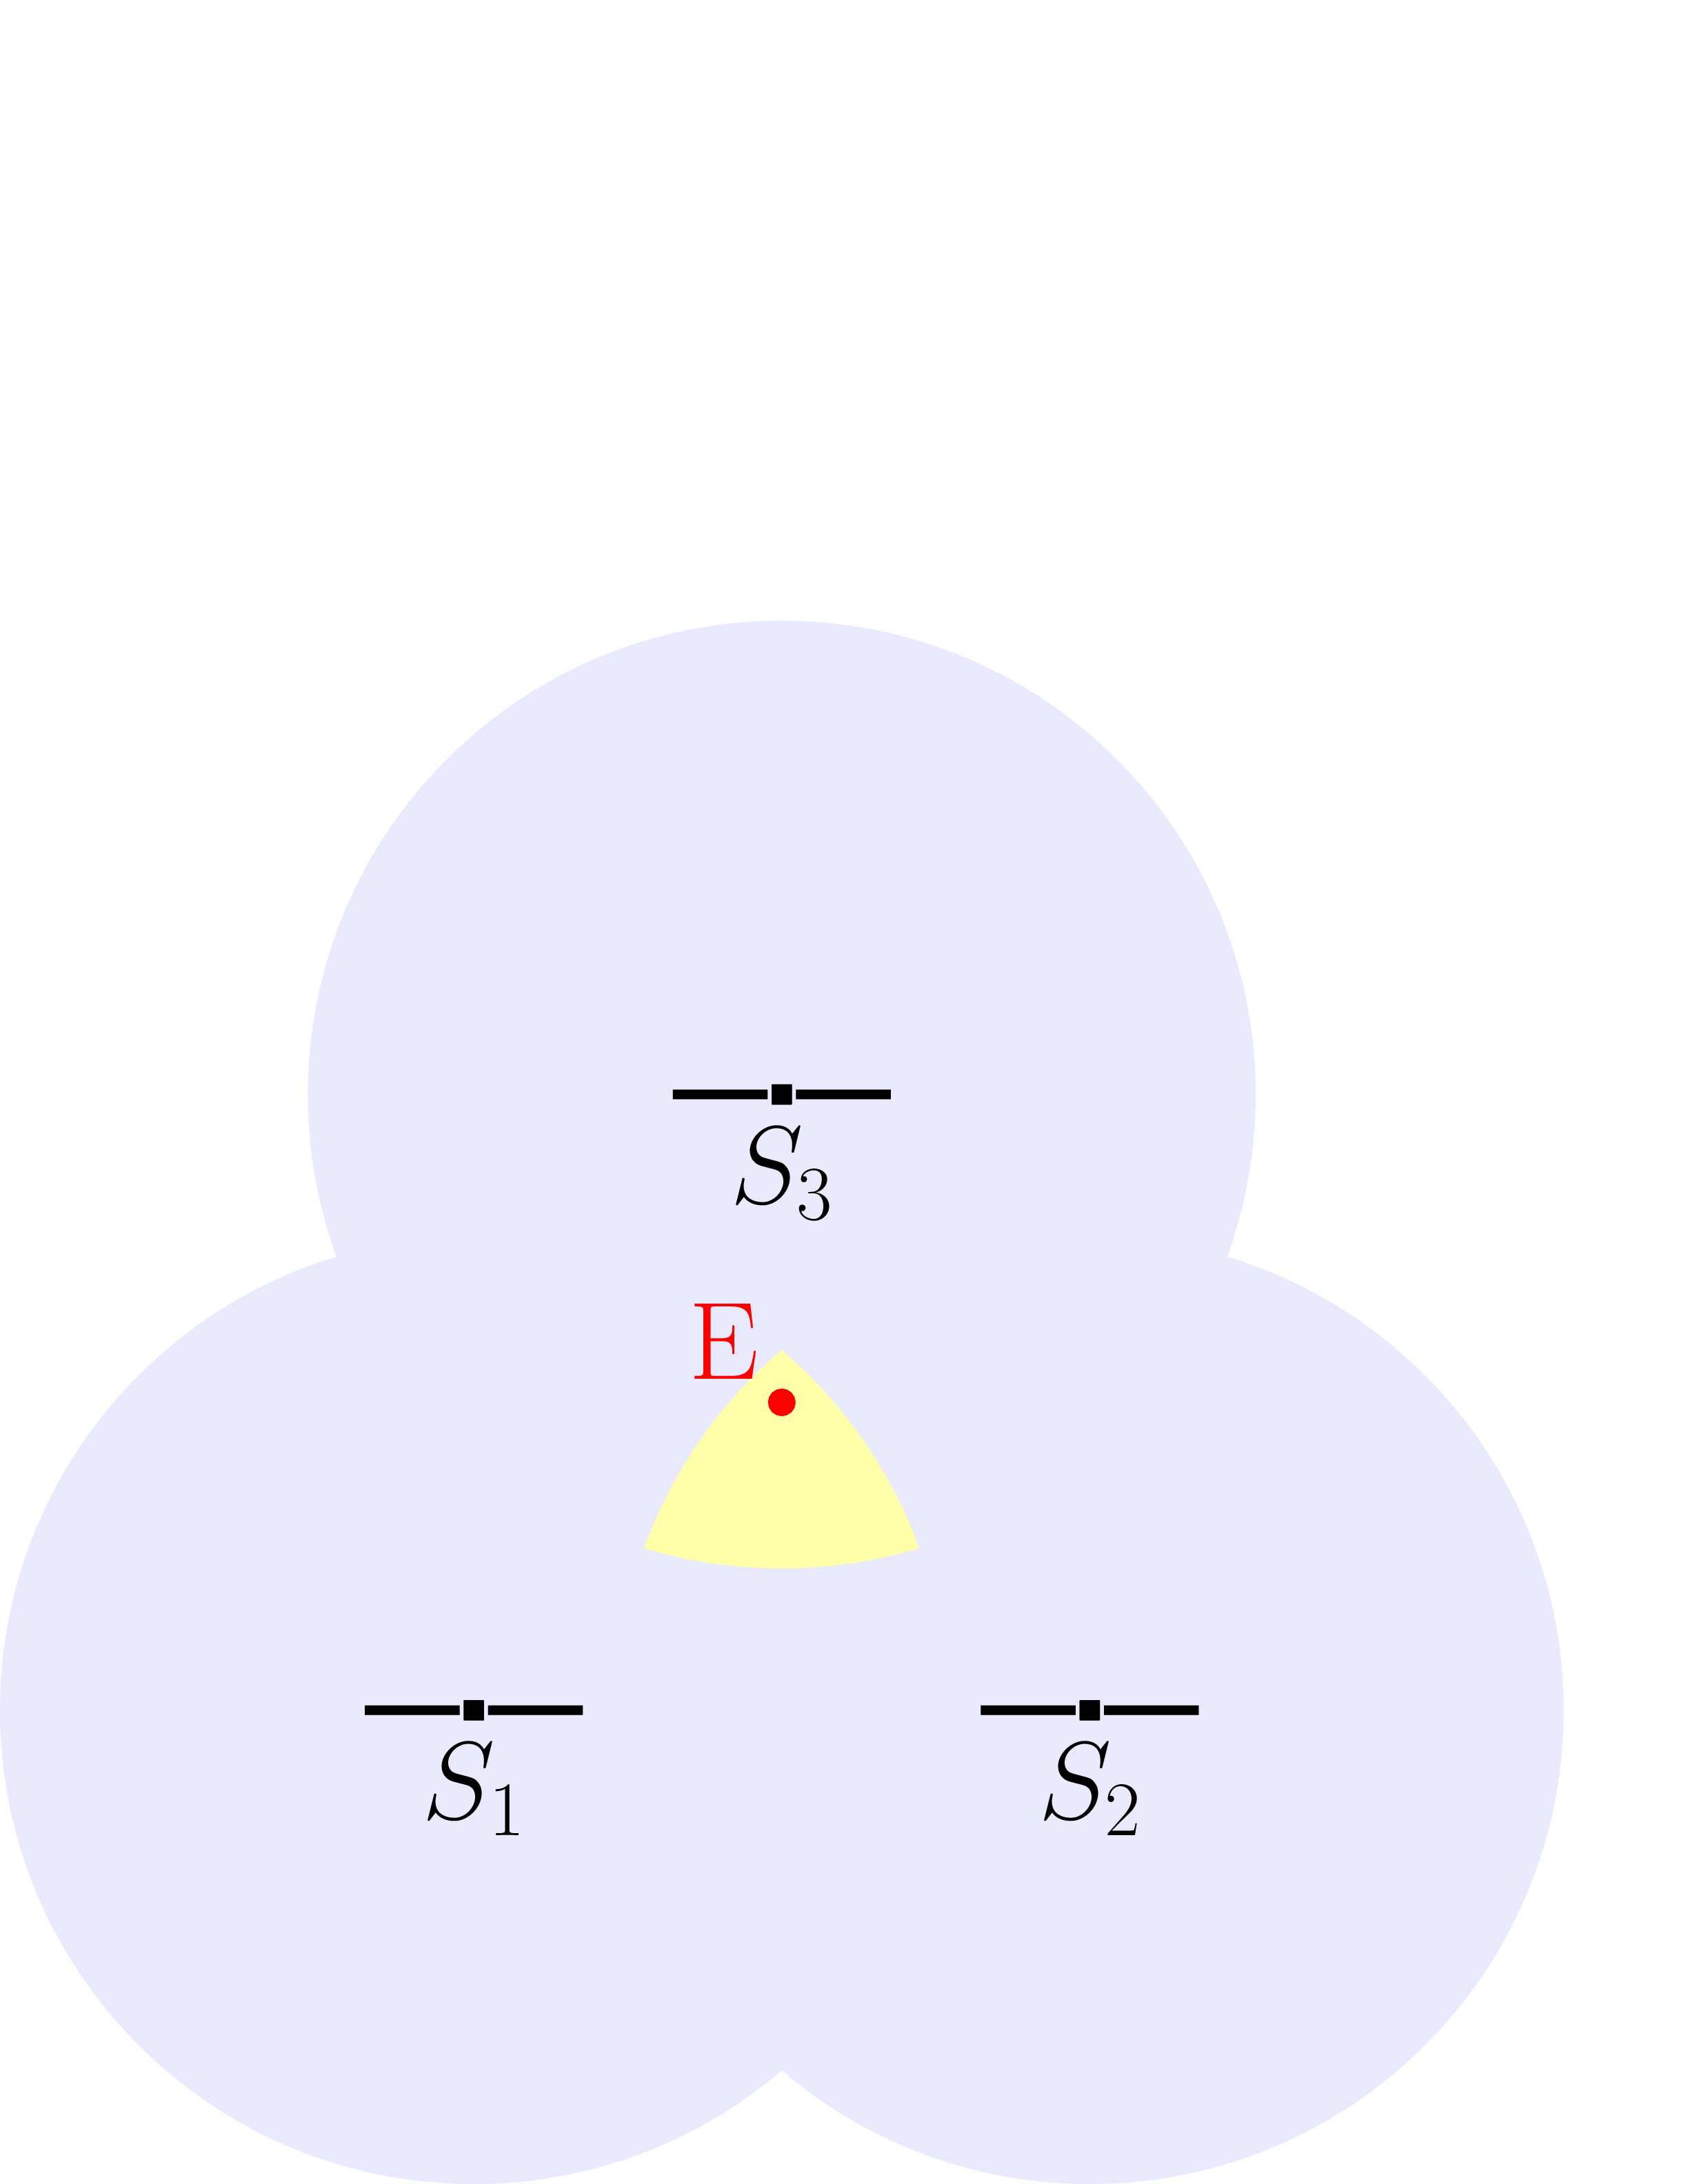

In [6]:
%%asy --root Images/gps_3_satelliten
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
pair z2=(1.3,0);
pair z3=(0.65,1.3);
real r=1;
path s1=circle(z1,r);
path s2=circle(z2,r);
path s3=circle(z3,r);

fill(s1, white+(lightblue*0.2));
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
draw(box((-0.02,-0.02),(0.02,0.02)));

fill(s2, white+(lightblue*0.2));
fill( shift(z2) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z2) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z2) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));

fill(s3, white+(lightblue*0.2));
fill( shift(z3) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z3) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z3) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z3) * box((-0.02,-0.02),(0.02,0.02)));

picture intersection;
fill(intersection,s1,lightred+lightgreen);
clip(intersection,s2);
clip(intersection,s3);
add(intersection);

label("$S_1$",z1,S);
label("$S_2$",z2,S);
label("$S_3$",z3,S);

dot("E",(0.65,0.65),NW,red+10bp);

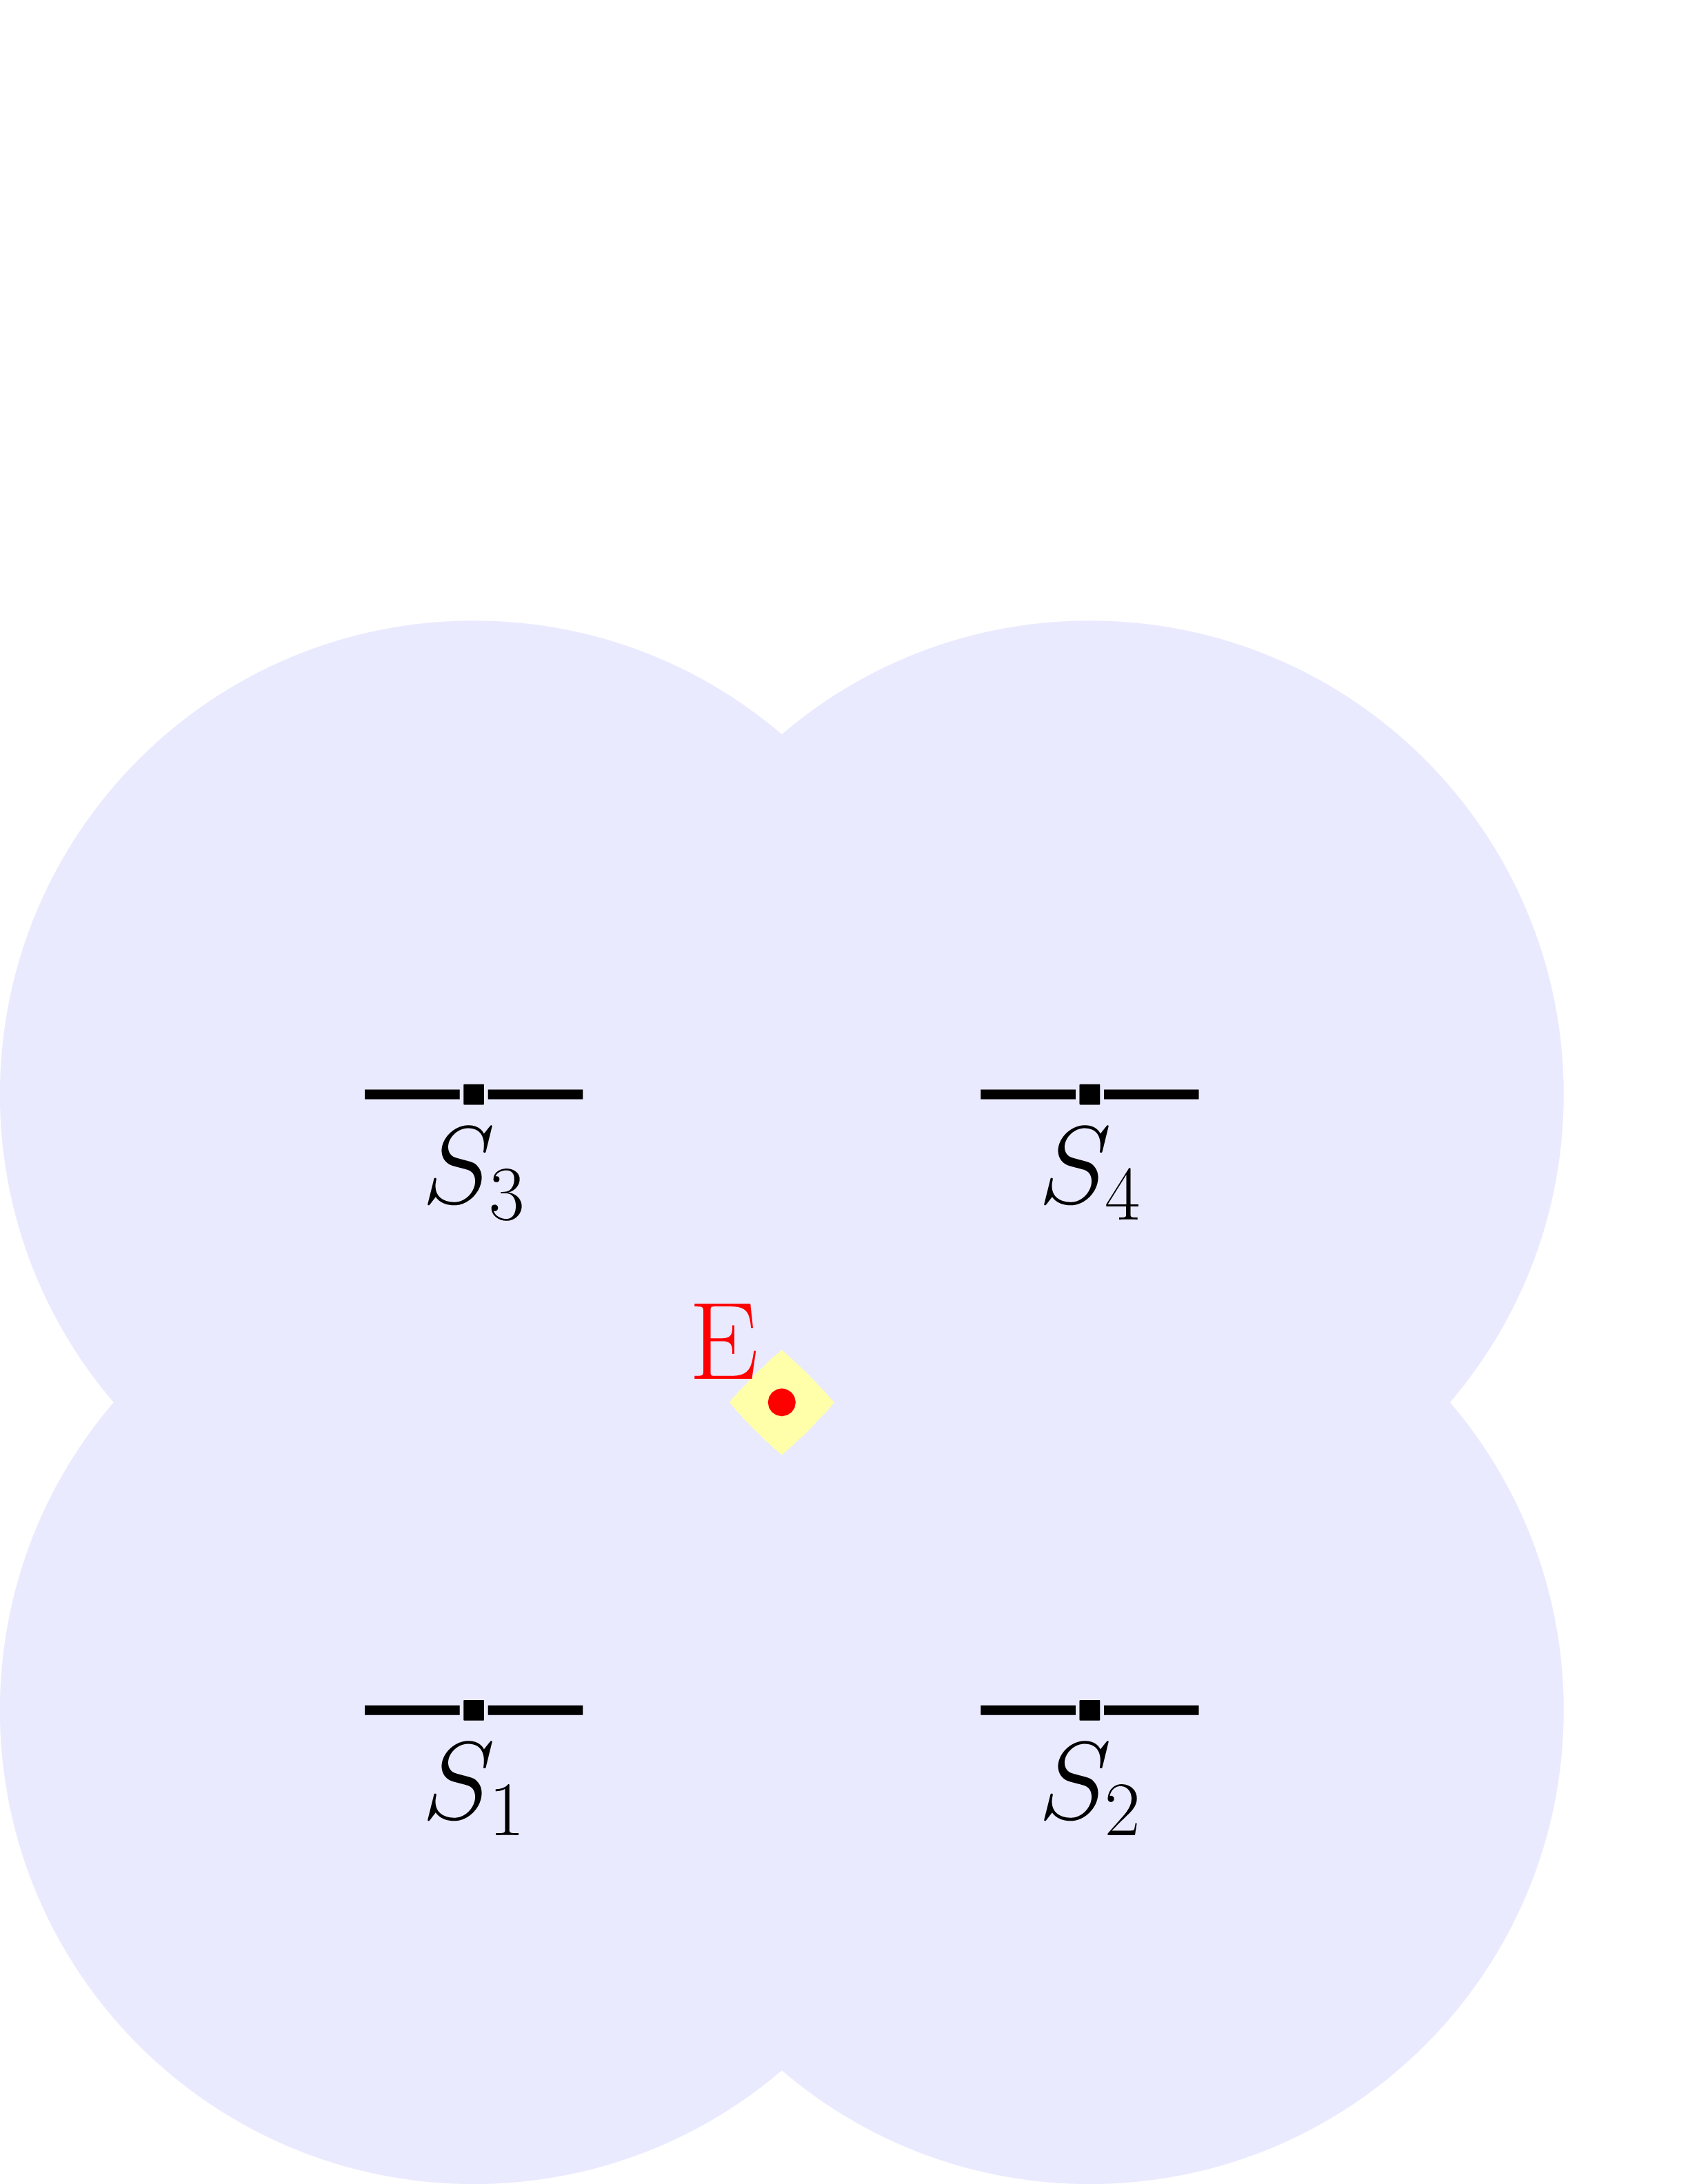

In [7]:
%%asy --root Images/gps_4_satelliten
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
pair z2=(1.3,0);
pair z3=(0,1.3);
pair z4=(1.3,1.3);
real r=1;
path s1=circle(z1,r);
path s2=circle(z2,r);
path s3=circle(z3,r);
path s4=circle(z4,r);

fill(s1, white+(lightblue*0.2));
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
draw(box((-0.02,-0.02),(0.02,0.02)));

fill(s2, white+(lightblue*0.2));
fill( shift(z2) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z2) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z2) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));

fill(s3, white+(lightblue*0.2));
fill( shift(z3) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z3) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z3) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z3) * box((-0.02,-0.02),(0.02,0.02)));

fill(s4, white+(lightblue*0.2));
fill( shift(z4) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z4) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z4) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z4) * box((-0.02,-0.02),(0.02,0.02)));

picture intersection;
fill(intersection,s1,lightred+lightgreen);
clip(intersection,s2);
clip(intersection,s3);
clip(intersection,s4);
add(intersection);

label("$S_1$",z1,S);
label("$S_2$",z2,S);
label("$S_3$",z3,S);
label("$S_4$",z4,S);

dot("E",(0.65,0.65),NW,red+10bp);

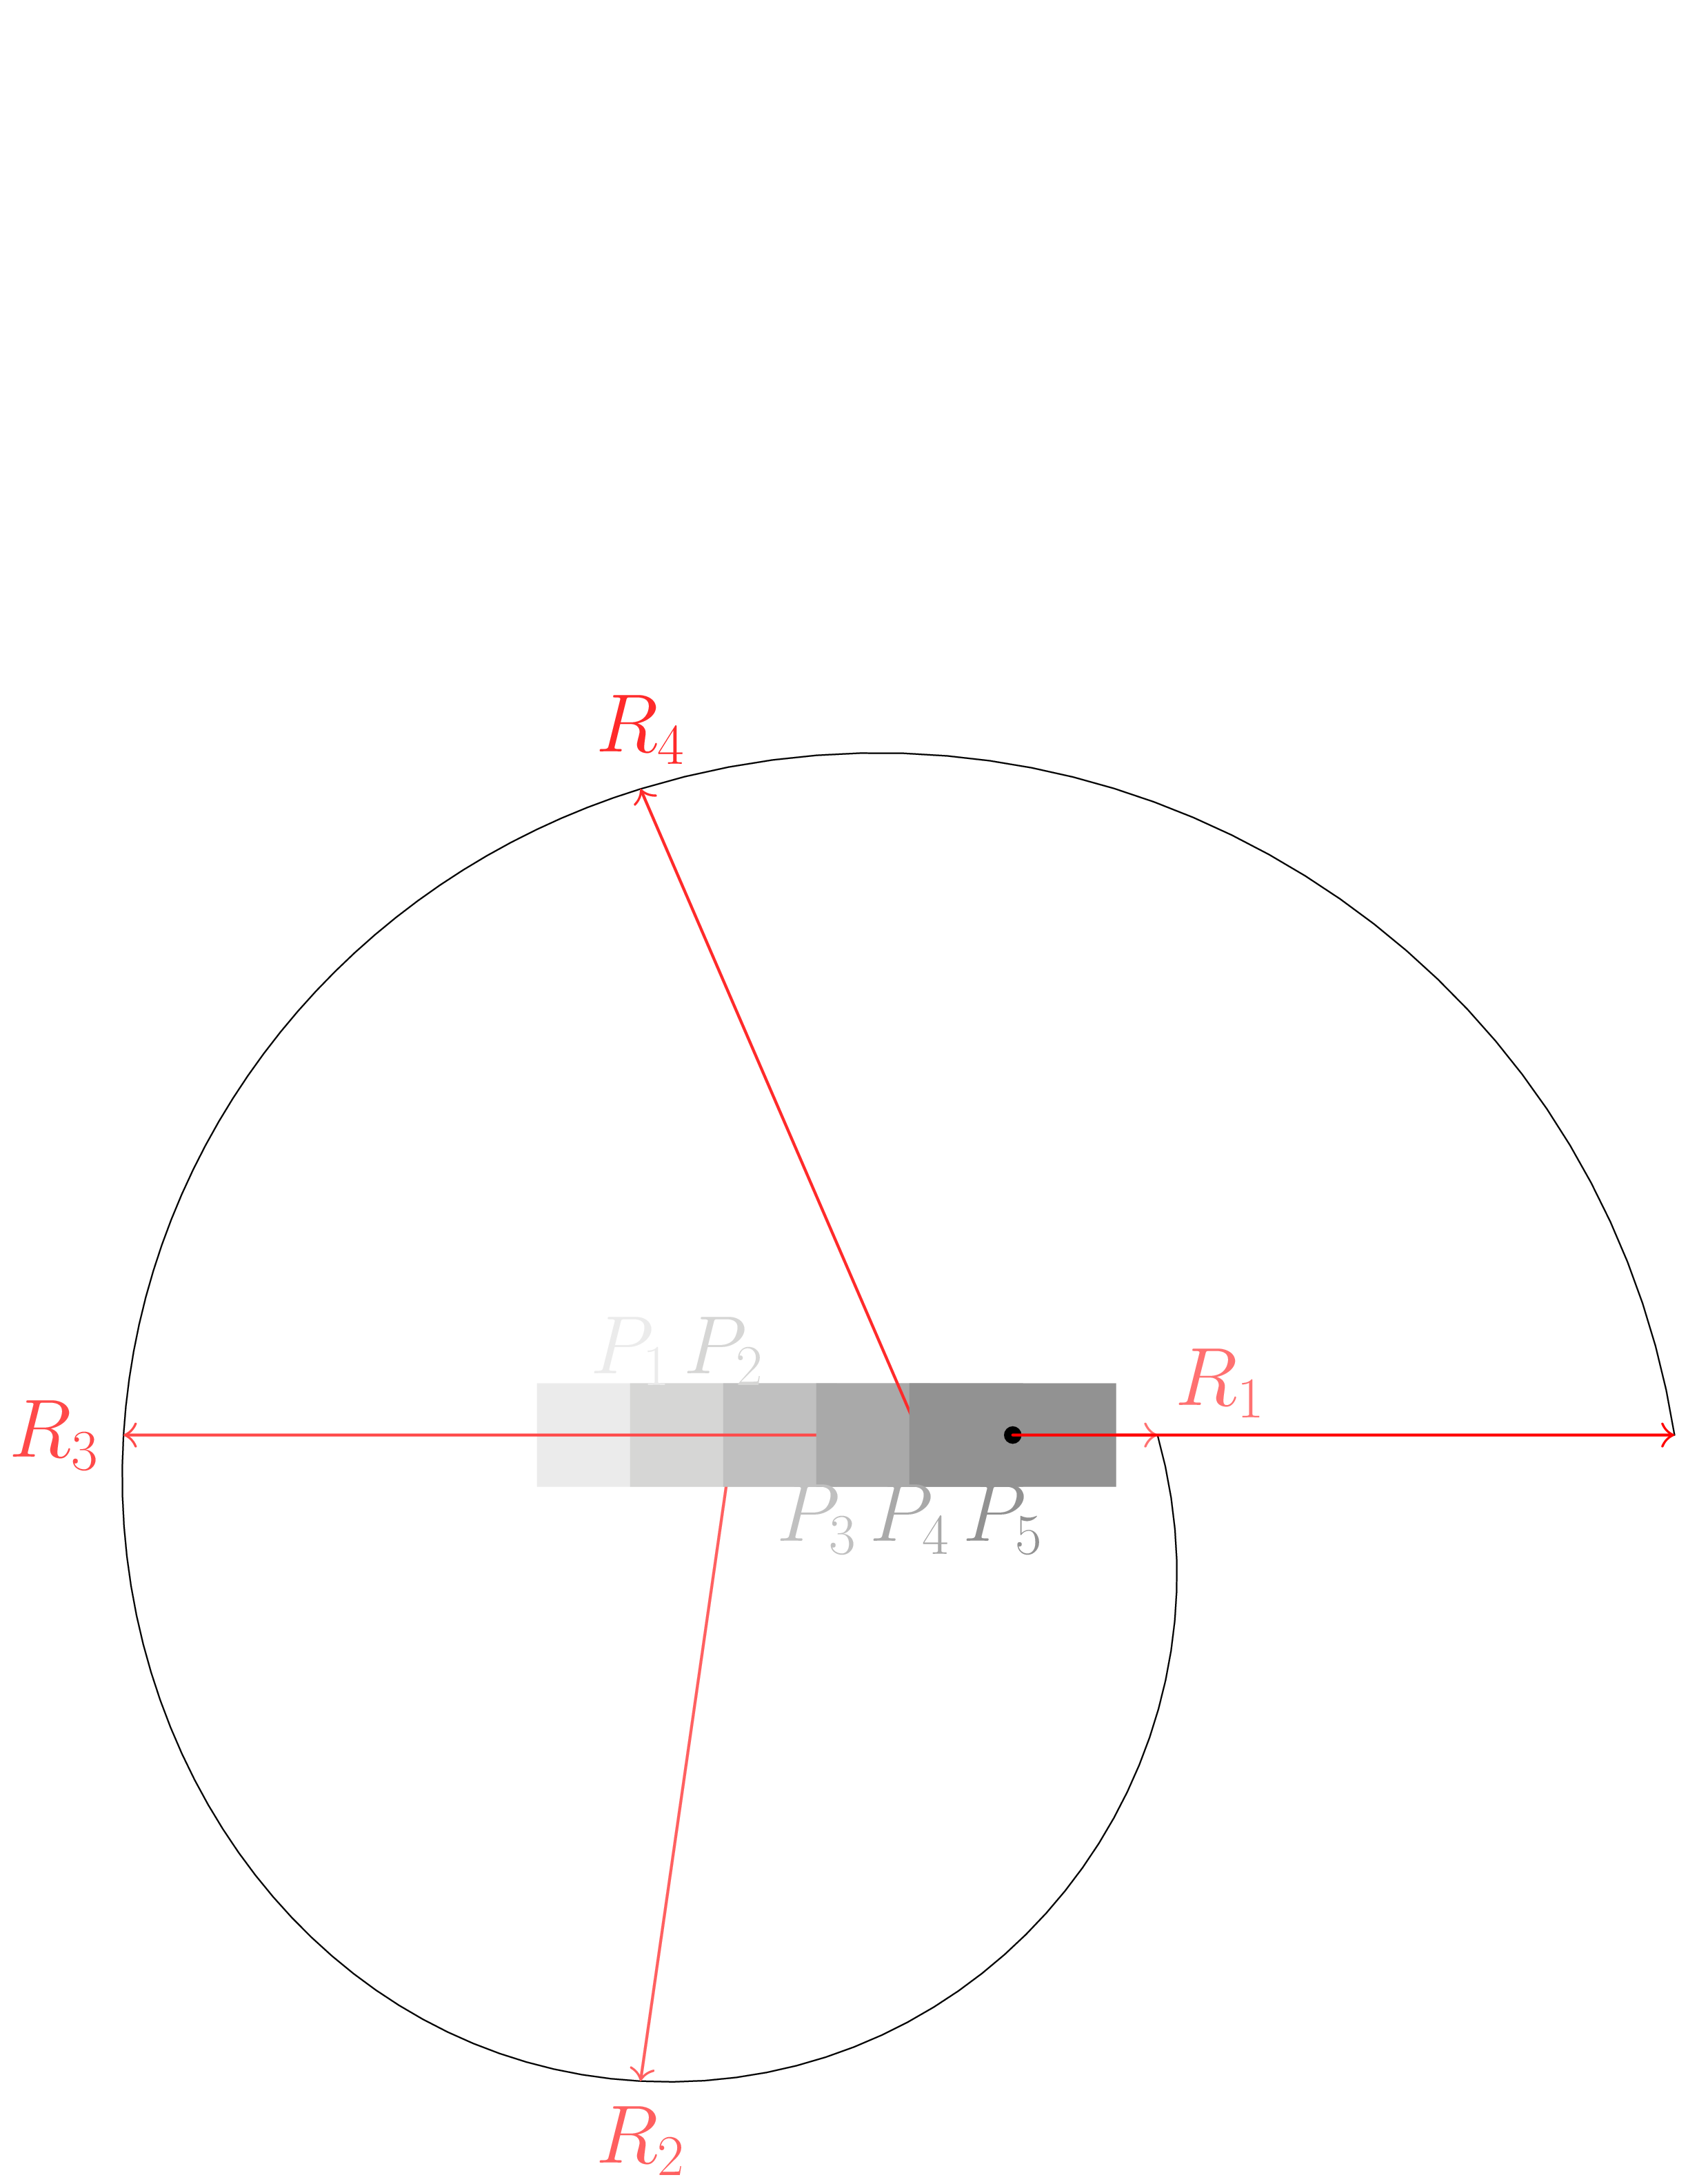

In [8]:
%%asy --root Images/bewegungskorrektur
settings.render = 4;
size(23cm,0);
\texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(30));

pair p1 = (0,0);
pair p2 = (0.18,0);
pair p3 = (0.36,0);
pair p4 = (0.54,0);
pair p5 = (0.72,0);

path p = (4/4,0) .. (0,-5/4) .. (-4/4,0)
.. (0,5/4) .. (2,0);
draw(p);

fill(shift(p1) * box((-.2,-0.1),(.2,0.1)), .9*white);
fill(shift(p1) * scale(.02) * unitcircle);
draw(shift(p1) * scale(.02) * unitcircle, .9*white+linewidth(1.0pt), L=Label("$P_1$", align=(0,2)));
draw(p1--(4/4,0), .8*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_1$", position=EndPoint, NE));
fill(shift(p2) * box((-.2,-0.1),(.2,0.1)), .8*white);
fill(shift(p2) * scale(.02) * unitcircle);
draw(shift(p2) * scale(.02) * unitcircle, .8*white+linewidth(1.0pt), L=Label("$P_2$", align=(0,2)));
draw(p2--(0,-5/4), .6*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_2$", position=EndPoint, S));
fill(shift(p3) * box((-.2,-0.1),(.2,0.1)), .7*white);
fill(shift(p3) * scale(.02) * unitcircle);
draw(shift(p3) * scale(.02) * unitcircle, .7*white+linewidth(1.0pt), L=Label("$P_3$", align=(0,-2)));
draw(p3--(-4/4,0), .4*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_3$", position=EndPoint, W));
fill(shift(p4) * box((-.2,-0.1),(.2,0.1)), .6*white);
fill(shift(p4) * scale(.02) * unitcircle);
draw(shift(p4) * scale(.02) * unitcircle, .6*white+linewidth(1.0pt), L=Label("$P_4$", align=(0,-2)));
draw(p4--(0,5/4), .2*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_4$", position=EndPoint, N));
fill(shift(p5) * box((-.2,-0.1),(.2,0.1)), .5*white);
fill(shift(p5) * scale(.02) * unitcircle);
draw(shift(p5) * scale(.02) * unitcircle, .5*white+linewidth(1.0pt), L=Label("$P_5$", align=(0,-2)));
draw(p5--(2,0), .0*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_5$", position=EndPoint, E));

# Kartografie

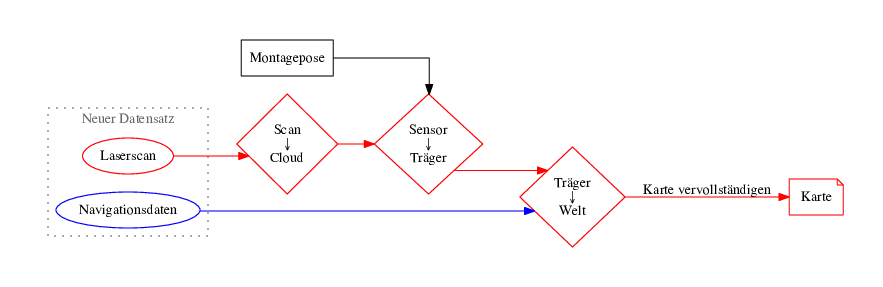

In [9]:
Laserscan = pydot.Node('Laserscan', shape='ellipse', color='red')
Karte = pydot.Node('Karte', shape='note', color='red')
MontagePose = pydot.Node('Montagepose', shape='rectangle')
NavDaten = pydot.Node('Navigationsdaten', shape='ellipse', color='blue')

ScanZuCloud = pydot.Node('"Scan\n&#8595;\nCloud"', shape='diamond', color='red')
SensorZuTraeger = pydot.Node('"Sensor\n&#8595;\nTräger"', shape='diamond', color='red')
TraegerZuWelt = pydot.Node('"Träger\n&#8595;\nWelt"', shape='diamond', color='red')

graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='ortho')

inputs = pydot.Cluster('inputs', label='Neuer Datensatz', style='dotted', color='gray40', fontcolor='gray40')
inputs.add_node(Laserscan)
inputs.add_node(NavDaten)

graph.add_node(MontagePose)
graph.add_subgraph(inputs)
graph.add_node(Karte)
graph.add_node(ScanZuCloud)
graph.add_node(SensorZuTraeger)
graph.add_node(TraegerZuWelt)

graph.add_edge(pydot.Edge(Laserscan, ScanZuCloud, color='red'))
graph.add_edge(pydot.Edge(ScanZuCloud, SensorZuTraeger, color='red'))
graph.add_edge(pydot.Edge(MontagePose, SensorZuTraeger))
graph.add_edge(pydot.Edge(SensorZuTraeger, TraegerZuWelt, color='red'))
graph.add_edge(pydot.Edge(NavDaten, TraegerZuWelt, color='blue'))
graph.add_edge(pydot.Edge(TraegerZuWelt, Karte, label='"Karte vervollständigen"', color='red'))

graph.write_pdf('Images/kartografie_der_laserscans.pdf')
img = WImage(filename='Images/kartografie_der_laserscans.pdf')
img

### Im Sensorkoordinatensystem

#### Ohne Bewegungskorrektur

In [10]:
ScanAP = pydot.Node(name='ScanAP', label='Laserscan', color='red')
ScanZuCloudAP = pydot.Node(name='ScanZuCloudAP', label='"Scan\n&#8595;\nCloud"', shape='diamond', group='g1', color='red')
NavDatenAP = pydot.Node(name='NavDatenAP', label='Navigationsdaten', color='blue')
ScanEP = pydot.Node(name='ScanEP', label='Laserscan', color='red')
ScanZuCloudEP = pydot.Node(name='ScanZuCloudEP', label='"Scan\n&#8595;\nCloud"', shape='diamond', group='g3', color='red')
NavDatenEP = pydot.Node(name='NavDatenEP', label='Navigationsdaten', color='blue')

Ausgangspose = pydot.Cluster('Ausgangspose', label='Ausgangspose (AP)', style='dotted', group='g1')
Ausgangspose.add_node(ScanAP)
Ausgangspose.add_node(NavDatenAP)

Endpose = pydot.Cluster('Endpose', label='Endpose (EP)', style='dotted', group='g3')
Endpose.add_node(ScanEP)
Endpose.add_node(NavDatenEP)

Bewegung = pydot.Cluster('Bewegungsänderung', label='Bewegungsänderung', rank='same', style='dashed', color='gray40', fontcolor='gray40')
Bewegung.add_subgraph(Ausgangspose)
Bewegung.add_subgraph(Endpose)

ICP  = pydot.Node('ICP', shape='doubleoctagon', color='red')
IMU  = pydot.Node('Bewegung', label='"NAV"', shape='doubleoctagon', color='blue')
Abgleich  = pydot.Node('Differenz', shape='doubleoctagon')
MontagePose = pydot.Node('Montagepose', shape='rectangle')

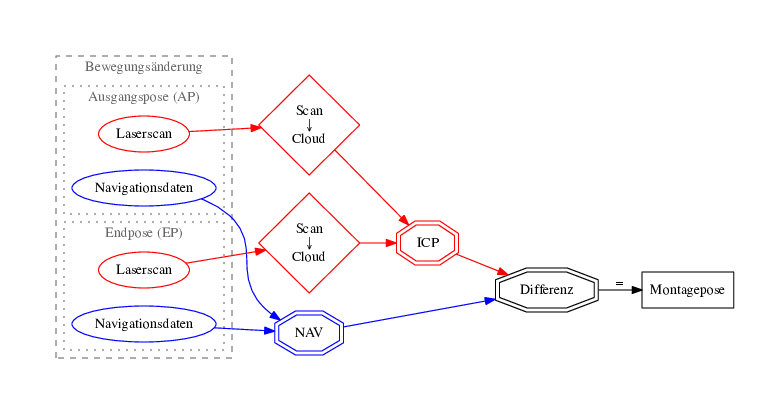

In [11]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

SensorBezugssystem = pydot.Cluster('SensorBezugssystem', label='', rank='same', style='invis', color='gray40', fontcolor='gray40')
SensorBezugssystem.add_subgraph(Bewegung)
SensorBezugssystem.add_node(ScanZuCloudAP)
SensorBezugssystem.add_node(ScanZuCloudEP)
SensorBezugssystem.add_node(IMU)

SensorBezugssystem.add_edge(pydot.Edge(ScanAP, ScanZuCloudAP, color='red'))
SensorBezugssystem.add_edge(pydot.Edge(ScanEP, ScanZuCloudEP, color='red'))
SensorBezugssystem.add_edge(pydot.Edge(NavDatenAP, IMU, color='blue'))
SensorBezugssystem.add_edge(pydot.Edge(NavDatenEP, IMU, color='blue'))

graph.add_subgraph(SensorBezugssystem)
graph.add_node(MontagePose)
graph.add_node(ICP)
graph.add_node(Abgleich)

graph.add_edge(pydot.Edge(ScanZuCloudAP, ICP, color='red'))
graph.add_edge(pydot.Edge(ScanZuCloudEP, ICP, color='red'))
graph.add_edge(pydot.Edge(ICP, Abgleich, color='red'))
graph.add_edge(pydot.Edge(IMU, Abgleich, color='blue'))

graph.add_edge(pydot.Edge(Abgleich, MontagePose, label='='))

graph.write_pdf('Images/kalibrierungImSC.pdf')
img = WImage(filename='Images/kalibrierungImSC.pdf')
img

#### Mit Bewegungskorrektur

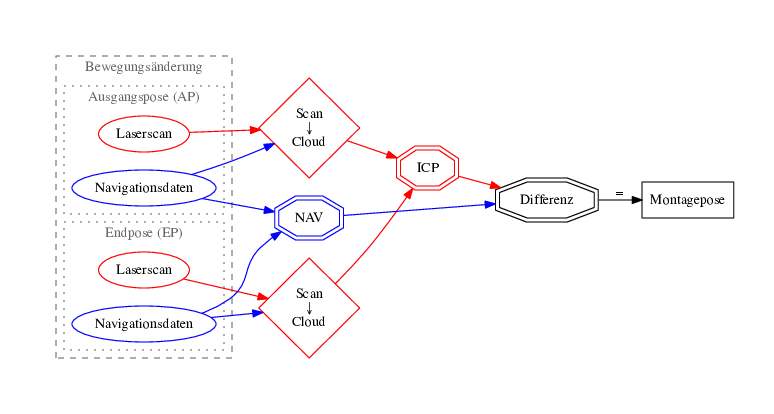

In [12]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

graph.add_subgraph(SensorBezugssystem)
graph.add_node(MontagePose)
graph.add_node(ICP)
graph.add_node(IMU)
graph.add_node(Abgleich)

graph.add_edge(pydot.Edge(ScanZuCloudAP, ICP, color='red'))
graph.add_edge(pydot.Edge(ScanZuCloudEP, ICP, color='red'))
graph.add_edge(pydot.Edge(NavDatenAP, ScanZuCloudAP, color='blue'))
graph.add_edge(pydot.Edge(NavDatenEP, ScanZuCloudEP, color='blue'))

graph.add_edge(pydot.Edge(ICP, Abgleich, color='red'))
graph.add_edge(pydot.Edge(IMU, Abgleich, color='blue'))

graph.add_edge(pydot.Edge(Abgleich, MontagePose, label='='))

graph.write_pdf('Images/kalibrierungImSCmitKorr.pdf')
img = WImage(filename='Images/kalibrierungImSCmitKorr.pdf')
img

### Im Weltkoordinatensystem

#### Ohne Bewegungskorrektur

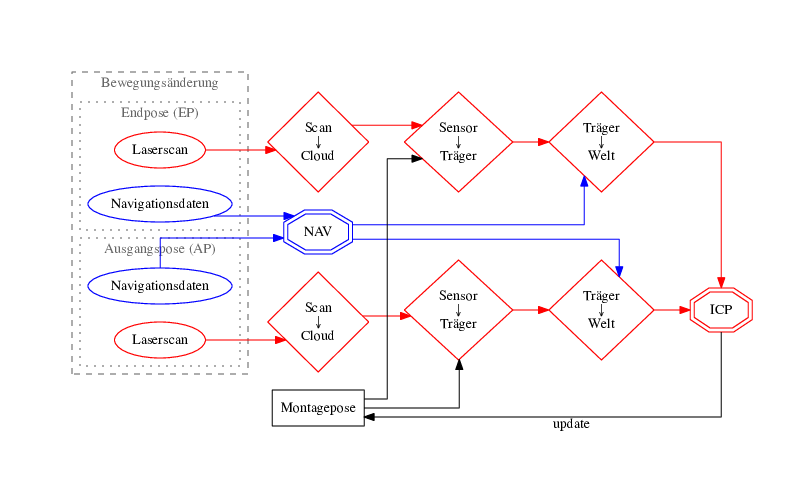

In [13]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='ortho')

SensorZuTraegerAP = pydot.Node(name='SensorZuTraegerAP', label='"Sensor\n&#8595;\nTräger"', shape='diamond', group='g3', color='red')
SensorZuTraegerEP = pydot.Node(name='SensorZuTraegerEP', label='"Sensor\n&#8595;\nTräger"', shape='diamond', group='g3', color='red')

TraegerBezugssystem = pydot.Cluster('TraegerBezugssystem', label='', rank='same', style='invis', color='gray40', fontcolor='gray40')
TraegerBezugssystem.add_subgraph(SensorBezugssystem)
TraegerBezugssystem.add_node(SensorZuTraegerAP)
TraegerBezugssystem.add_node(SensorZuTraegerEP)
TraegerBezugssystem.add_node(MontagePose)

TraegerBezugssystem.add_edge(pydot.Edge(MontagePose, SensorZuTraegerAP))
TraegerBezugssystem.add_edge(pydot.Edge(MontagePose, SensorZuTraegerEP))
TraegerBezugssystem.add_edge(pydot.Edge(ScanZuCloudAP, SensorZuTraegerAP, color='red'))
TraegerBezugssystem.add_edge(pydot.Edge(ScanZuCloudEP, SensorZuTraegerEP, color='red'))

TraegerZuWeltAP = pydot.Node(name='TraegerZuWeltAP', label='"Träger\n&#8595;\nWelt"', shape='diamond', group='g3', color='red')
TraegerZuWeltEP = pydot.Node(name='TraegerZuWeltEP', label='"Träger\n&#8595;\nWelt"', shape='diamond', group='g3', color='red')

WeltBezugssystem = pydot.Cluster('TraegerBezugssystem', label='', rank='same', style='invis', color='gray40', fontcolor='gray40')
WeltBezugssystem.add_subgraph(TraegerBezugssystem)
WeltBezugssystem.add_node(TraegerZuWeltAP)
WeltBezugssystem.add_node(TraegerZuWeltEP)
WeltBezugssystem.add_node(IMU)

WeltBezugssystem.add_edge(pydot.Edge(IMU, TraegerZuWeltAP, color='blue'))
WeltBezugssystem.add_edge(pydot.Edge(IMU, TraegerZuWeltEP, color='blue'))
WeltBezugssystem.add_edge(pydot.Edge(SensorZuTraegerAP, TraegerZuWeltAP, color='red'))
WeltBezugssystem.add_edge(pydot.Edge(SensorZuTraegerEP, TraegerZuWeltEP, color='red'))

graph.add_subgraph(WeltBezugssystem)
graph.add_node(ICP)

graph.add_edge(pydot.Edge(TraegerZuWeltAP, ICP, color='red'))
graph.add_edge(pydot.Edge(TraegerZuWeltEP, ICP, color='red'))
graph.add_edge(pydot.Edge(ICP, MontagePose, xlabel='\ update'))

graph.write_pdf('Images/kalibrierungImWC.pdf')
img = WImage(filename='Images/kalibrierungImWC.pdf')
img

#### Mit Bewegungskorrektur

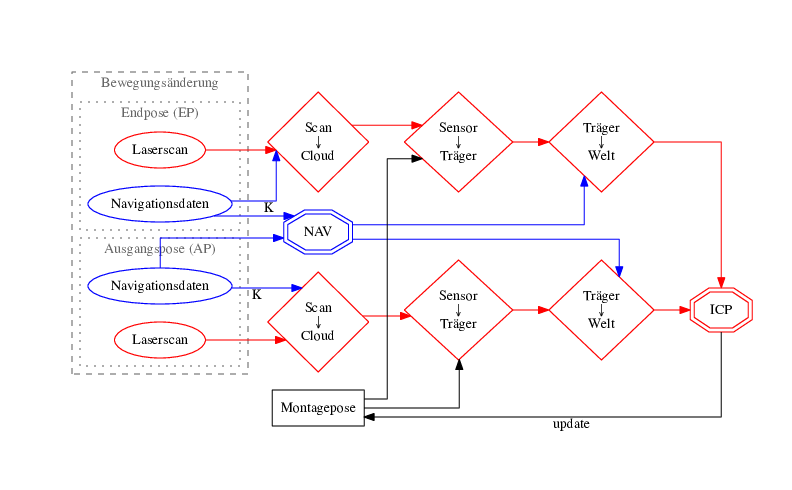

In [14]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='ortho')

graph.add_subgraph(WeltBezugssystem)
graph.add_node(ICP)

graph.add_edge(pydot.Edge(NavDatenAP, ScanZuCloudAP, color='blue', xlabel='K'))
graph.add_edge(pydot.Edge(NavDatenEP, ScanZuCloudEP, color='blue', xlabel='K'))

graph.add_edge(pydot.Edge(TraegerZuWeltAP, ICP, color='red'))
graph.add_edge(pydot.Edge(TraegerZuWeltEP, ICP, color='red'))
graph.add_edge(pydot.Edge(ICP, MontagePose, xlabel='\ update'))

graph.write_pdf('Images/kalibrierungImWCmitKorr.pdf')
img = WImage(filename='Images/kalibrierungImWCmitKorr.pdf')
img

# Laserscanner Velodyne HDL-32e

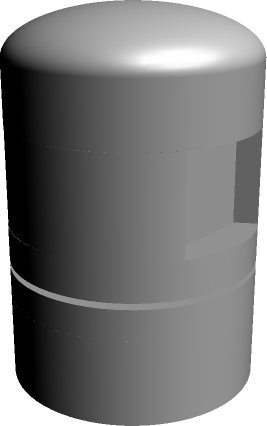

In [15]:
%%asy --root Images/velodyne
import solids;

surface velodyne() {
    real heightV=.8;
    path3 laserBase = path3((-0.4,0.7) -- (-0.5,sin(acos(-0.5))) .. (-1,0) .. (0,-1) .. (1,0) .. (0.5,sin(acos(0.5))) -- (0.4,0.7));

    surface top = shift(0.9Z) * scale(1,1,0.4) * unithemisphere;
    surface upperhead = surface(shift(0.4Z) * scale(1,1,0.5) * unitcylinder);
    surface laserEye = surface(shift(heightV/2*Z) * surface(unitcircle), shift(-heightV/2*Z) * extrude(laserBase --- cycle, heightV*Z), shift(-heightV/2*Z) * surface(unitcircle));
    surface lowerhead = surface(shift(-0.7Z) * scale(1,1,0.3) * unitcylinder, shift(-1Z) * surface(unitcircle));
    surface base = surface(shift(-0.75Z) * surface(unitcircle), shift(-1.7Z) * scale(1,1,0.95) * unitcylinder);
    surface velodyne = surface(top, upperhead, laserEye, lowerhead, base);

    return velodyne;
}

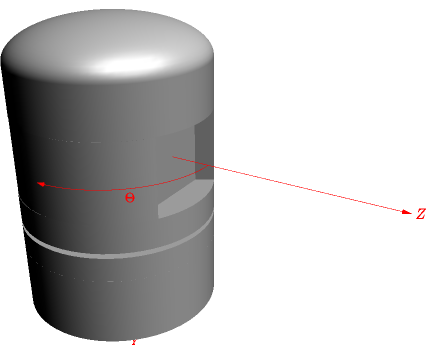

In [16]:
%%asy --root Images/velodyne_sc
import three;
import "Images/velodyne" as laserscanner;

//settings.render=16;
size(15cm);

draw(velodyne(), surfacepen=white);
draw(rotate(-90,X) * (O--2.5Y), red, Arrow3(emissive(red)), L=Label("$Y$", position=EndPoint));
draw(rotate(-90,X) * (O--3Z), red, Arrow3(emissive(red)), L=Label("$Z$", position=EndPoint));
draw(rotate(-90,X) * arc(c=(0,0,0),1.1Z, 1.1X), red, arrow=Arrow3(emissive(red)), L=Label("$\Theta$"));

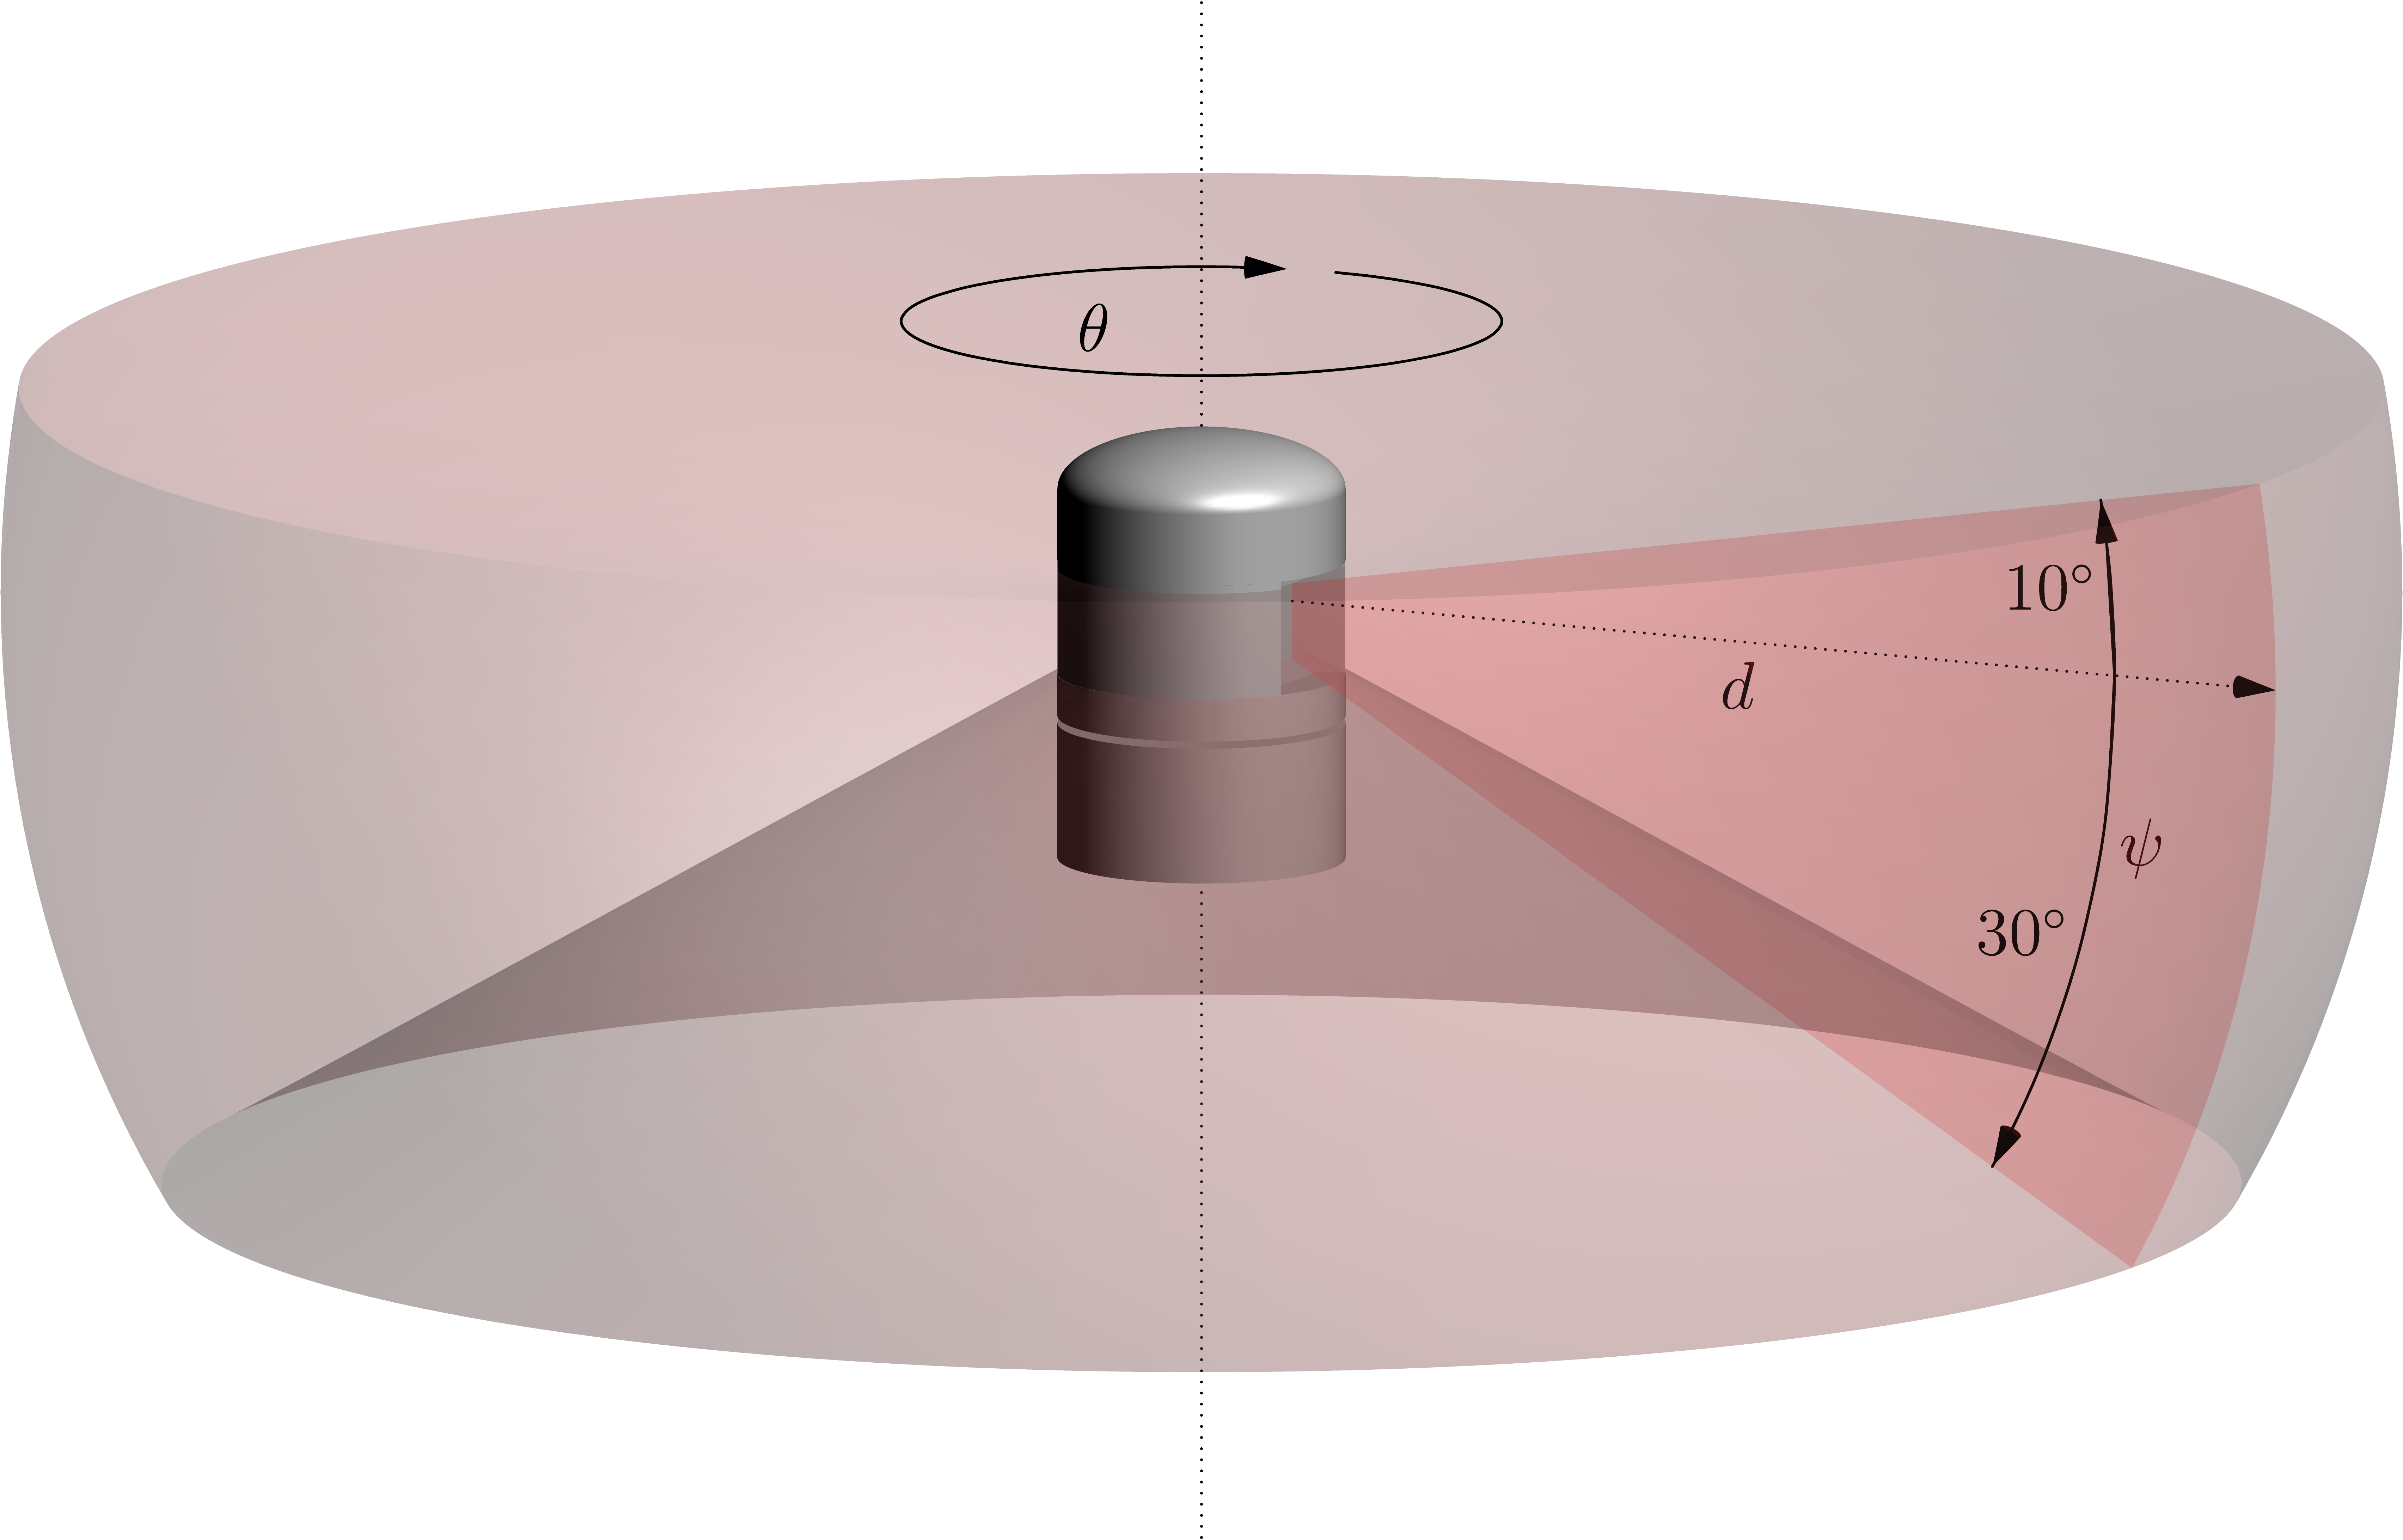

In [17]:
%%asy --root Images/velodyne_view
import three;
import "Images/velodyne" as laserscanner;
texpreamble("\usepackage{lmodern}");

size(15cm);
settings.render=16;
currentprojection=orthographic(8,4,1.5, center=true);

pen outside = white+opacity(1);
pen viewpoint = red+white;

draw(shift(-.02Z) * scale(.12,.12,.12) * velodyne(), outside);

path3 view = rotate(90,X) * path3((0,0) -- arc((0,0), 1, 10, -30) --- cycle);
draw(surface(rotate(90, Z) * view), emissive(red+black+opacity(0.2)));
draw(surface(revolution(view)), viewpoint+opacity(0.2));

draw(-.8Z -- .5Z, linetype(new real[] {0,4}));
draw(shift(0,0,.23) * path3(arc((0,0),.25, 180, -170)), black, arrow=Arrow3(emissive(black)), L=Label("$\theta$"));
draw(rotate(90,Z) * rotate(90,X) * path3(arc((0,0),.85, -30, 10)), L=Label("$\psi$", align=E));
draw(rotate(90,Z) * rotate(90,X) * path3(arc((0,0),.85, 0, 10)), arrow=Arrow3(emissive(black)), L=Label("$10^{\circ}$", align=W));
draw(rotate(90,Z) * rotate(90,X) * path3(arc((0,0),.85, 0, -30)), arrow=Arrow3(emissive(black)), L=Label("$30^{\circ}$", align=W));
draw(rotate(-90,X) * (O--1Z), linetype(new real[] {0,4}), arrow=Arrow3(emissive(black)), L=Label("$d$", align=S));

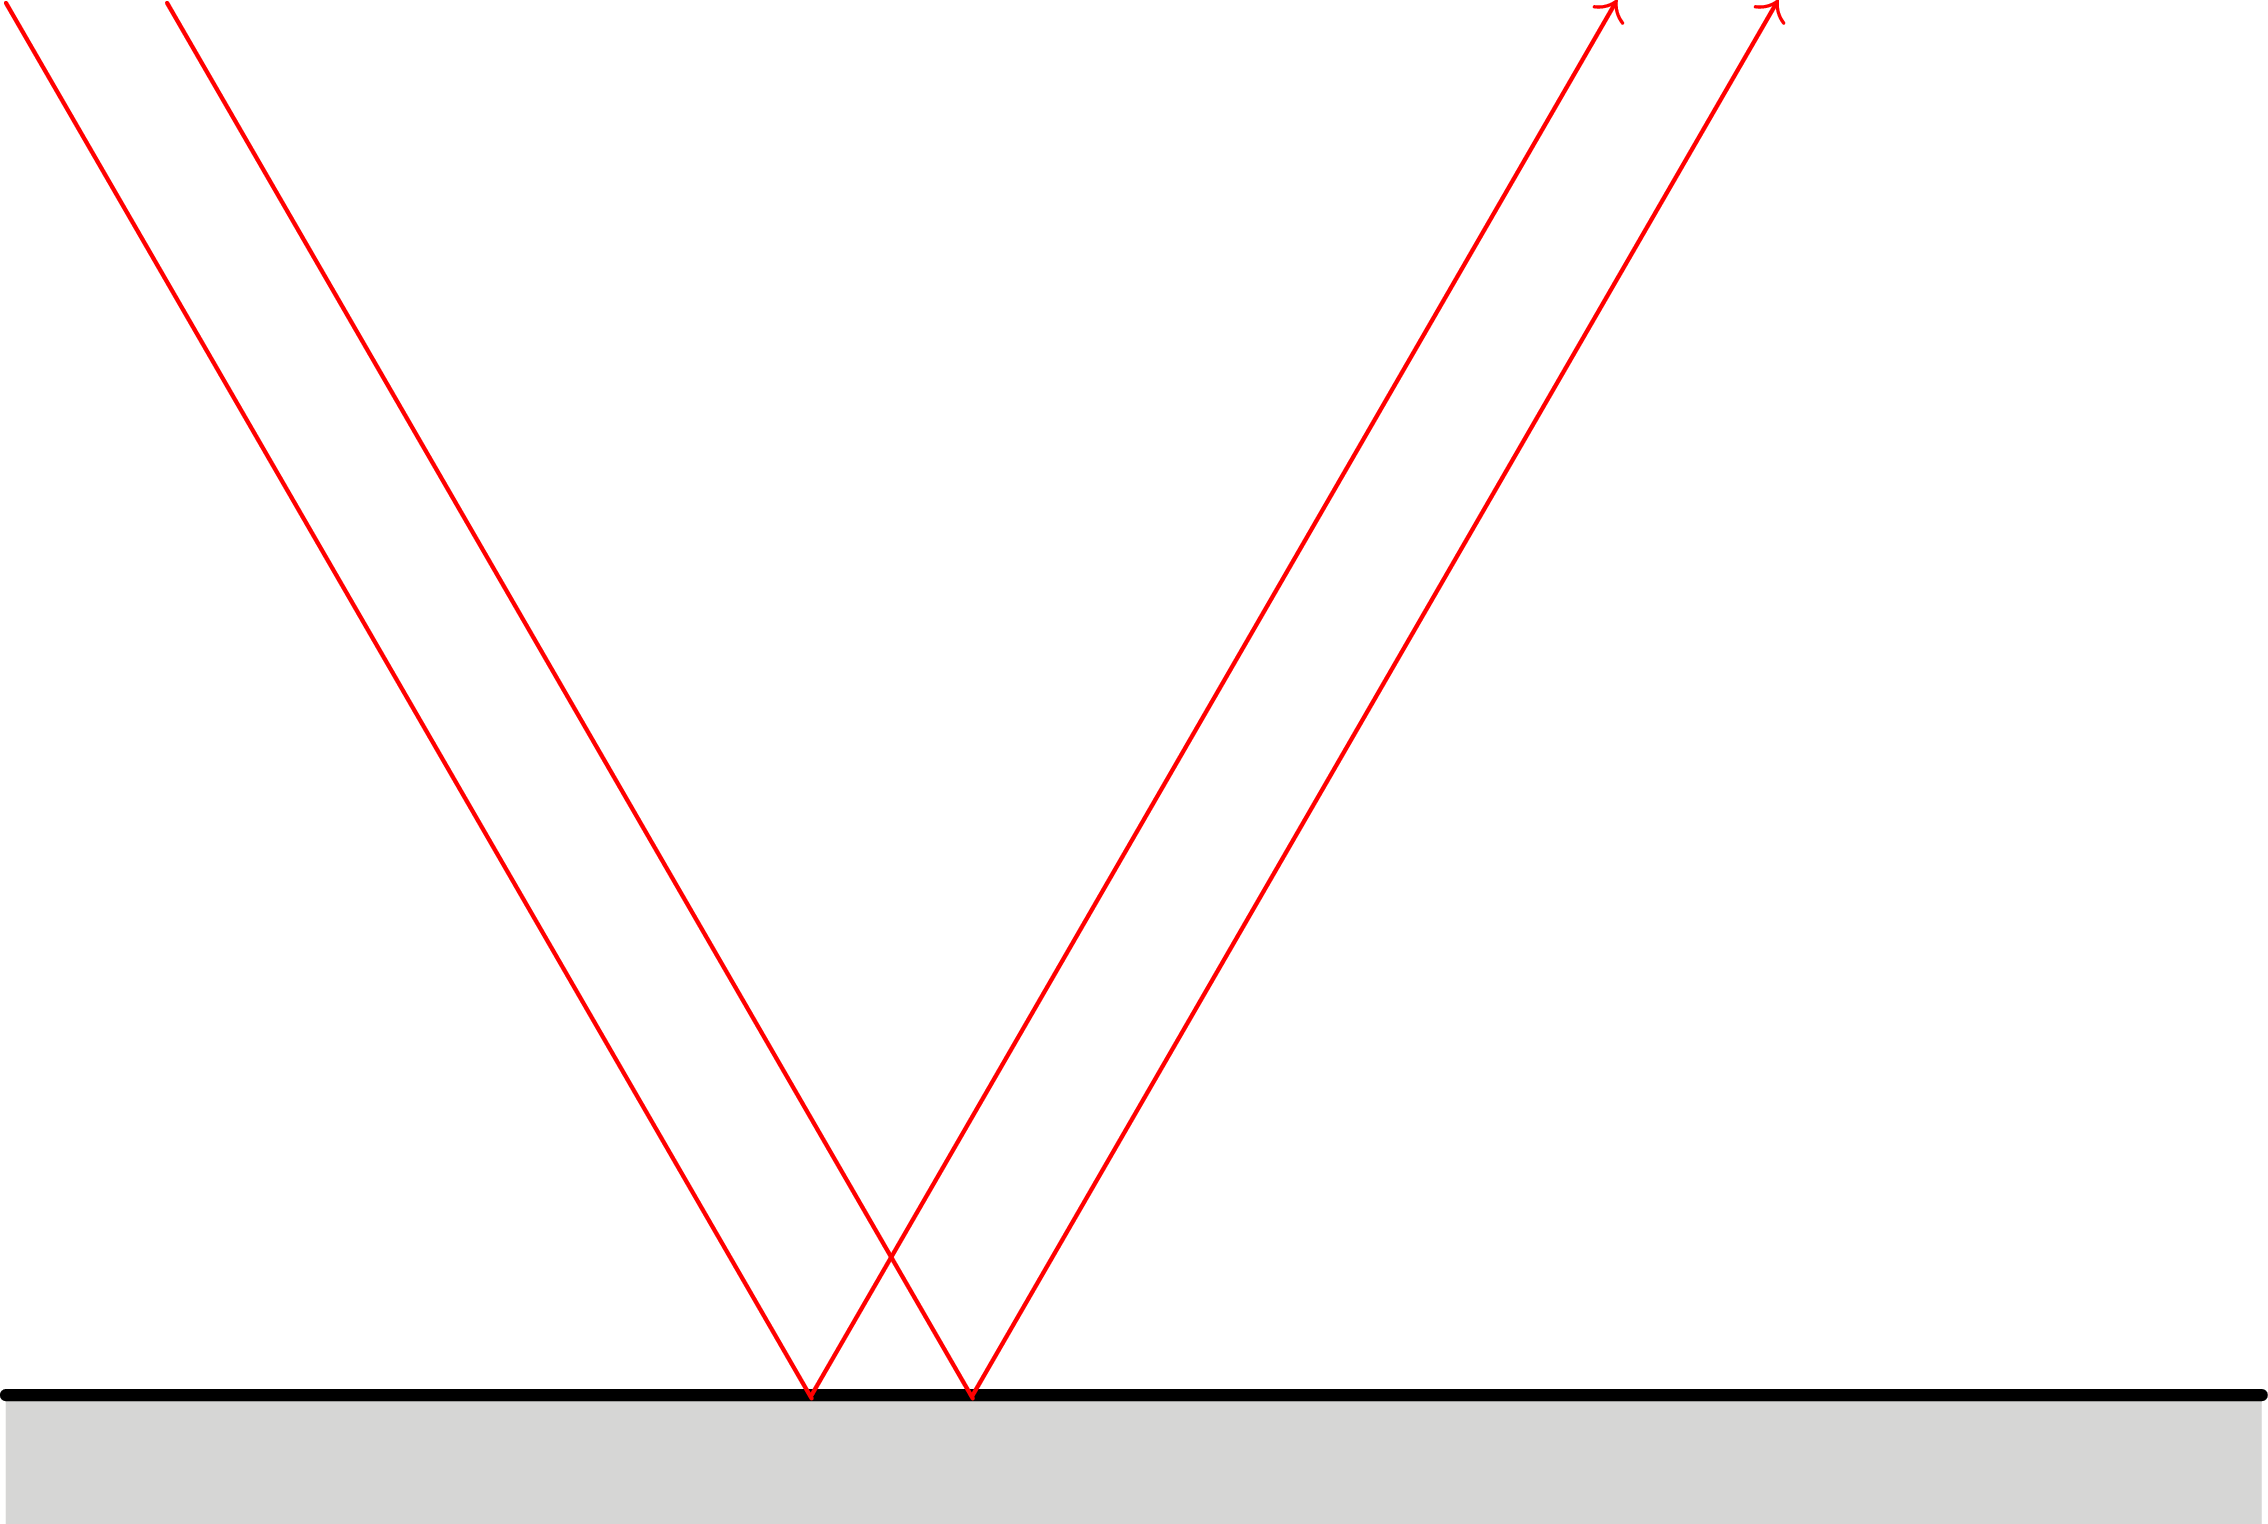

In [18]:
%%asy --root Images/reflexion
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

fill(box((0,0),(3.5,-.2)),.8white);
draw((0,0)--(3.5,0), linewidth(3.0pt));

draw(shift(0,2.16) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.25,0) * rotate(60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

draw(shift(0.25,2.16) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.5,0) * rotate(60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

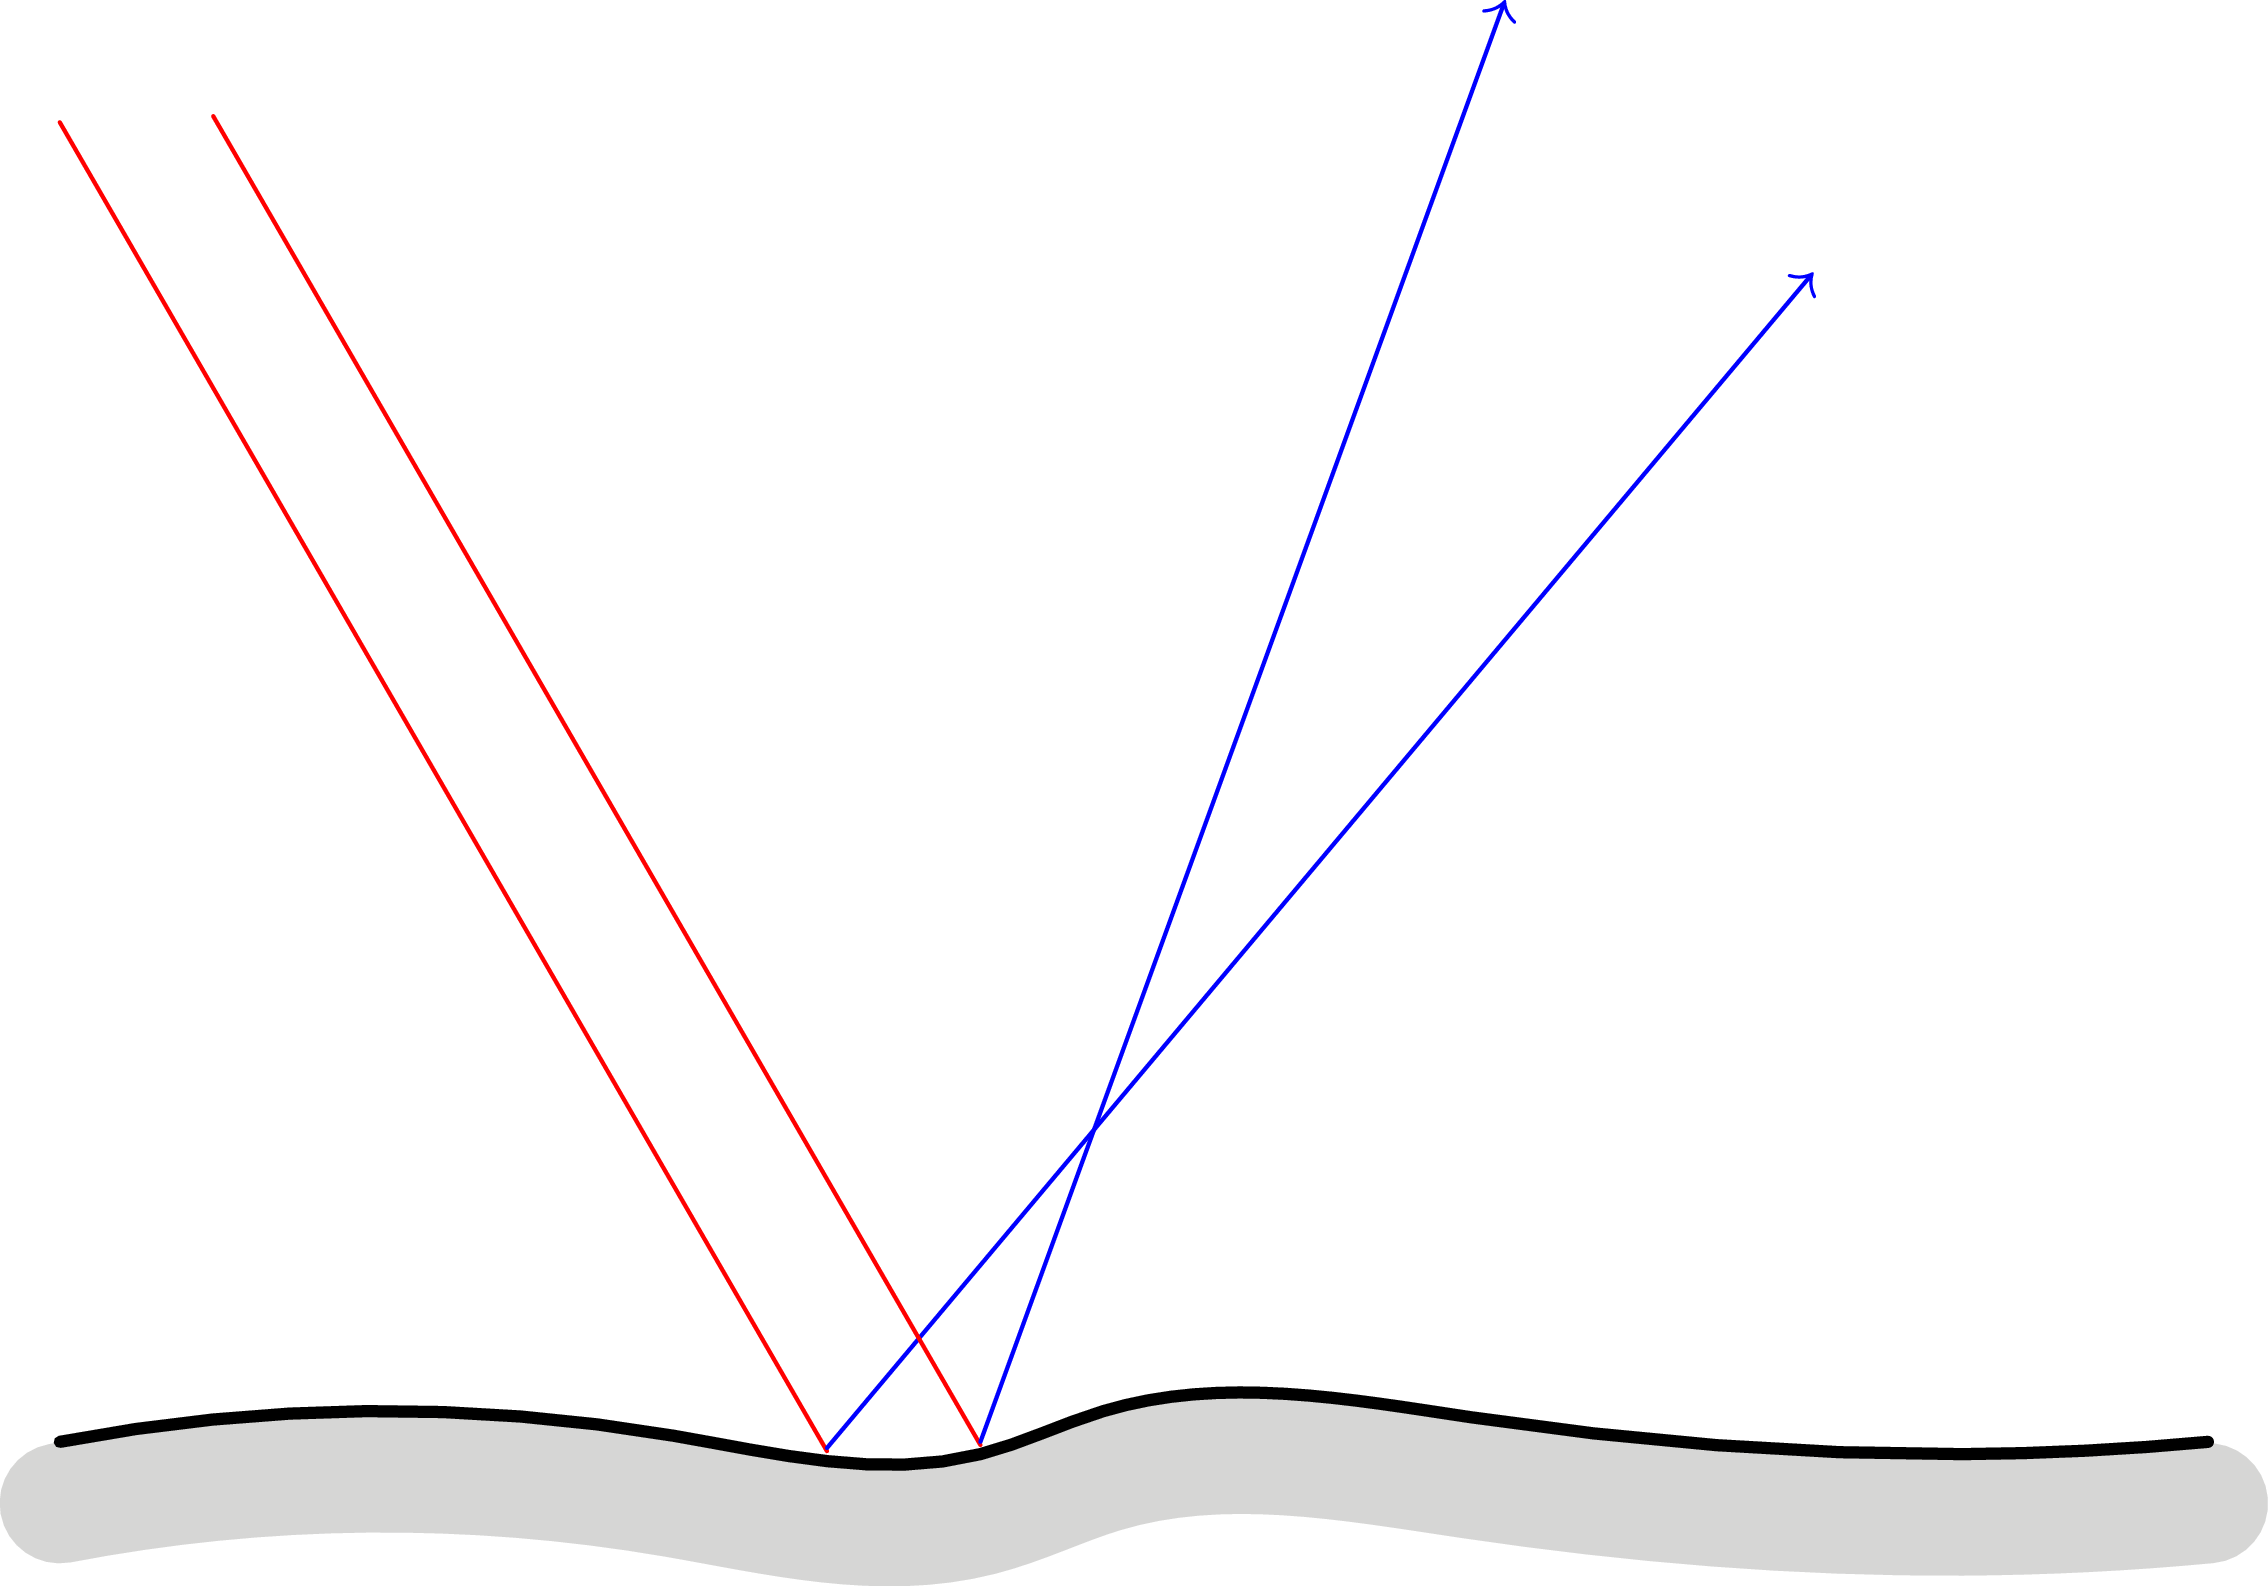

In [19]:
%%asy --root Images/diffuse_reflexion
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

path surf = (0,0) .. (1,.01) .. (1.5,-.02) .. (1.7,.05) .. (2.3,.04) .. (3.1,-.02) .. (3.5,0);
draw(shift(0,-.1) * surf, linewidth(30.0pt)+.8white);
draw(surf, linewidth(3.0pt));

draw(shift(0,2.15) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.25,-.01) * rotate(50) * ((0,0)--(2.5,0)), blue+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

draw(shift(0.25,2.16) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.5,0) * rotate(70) * ((0,0)--(2.5,0)), blue+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

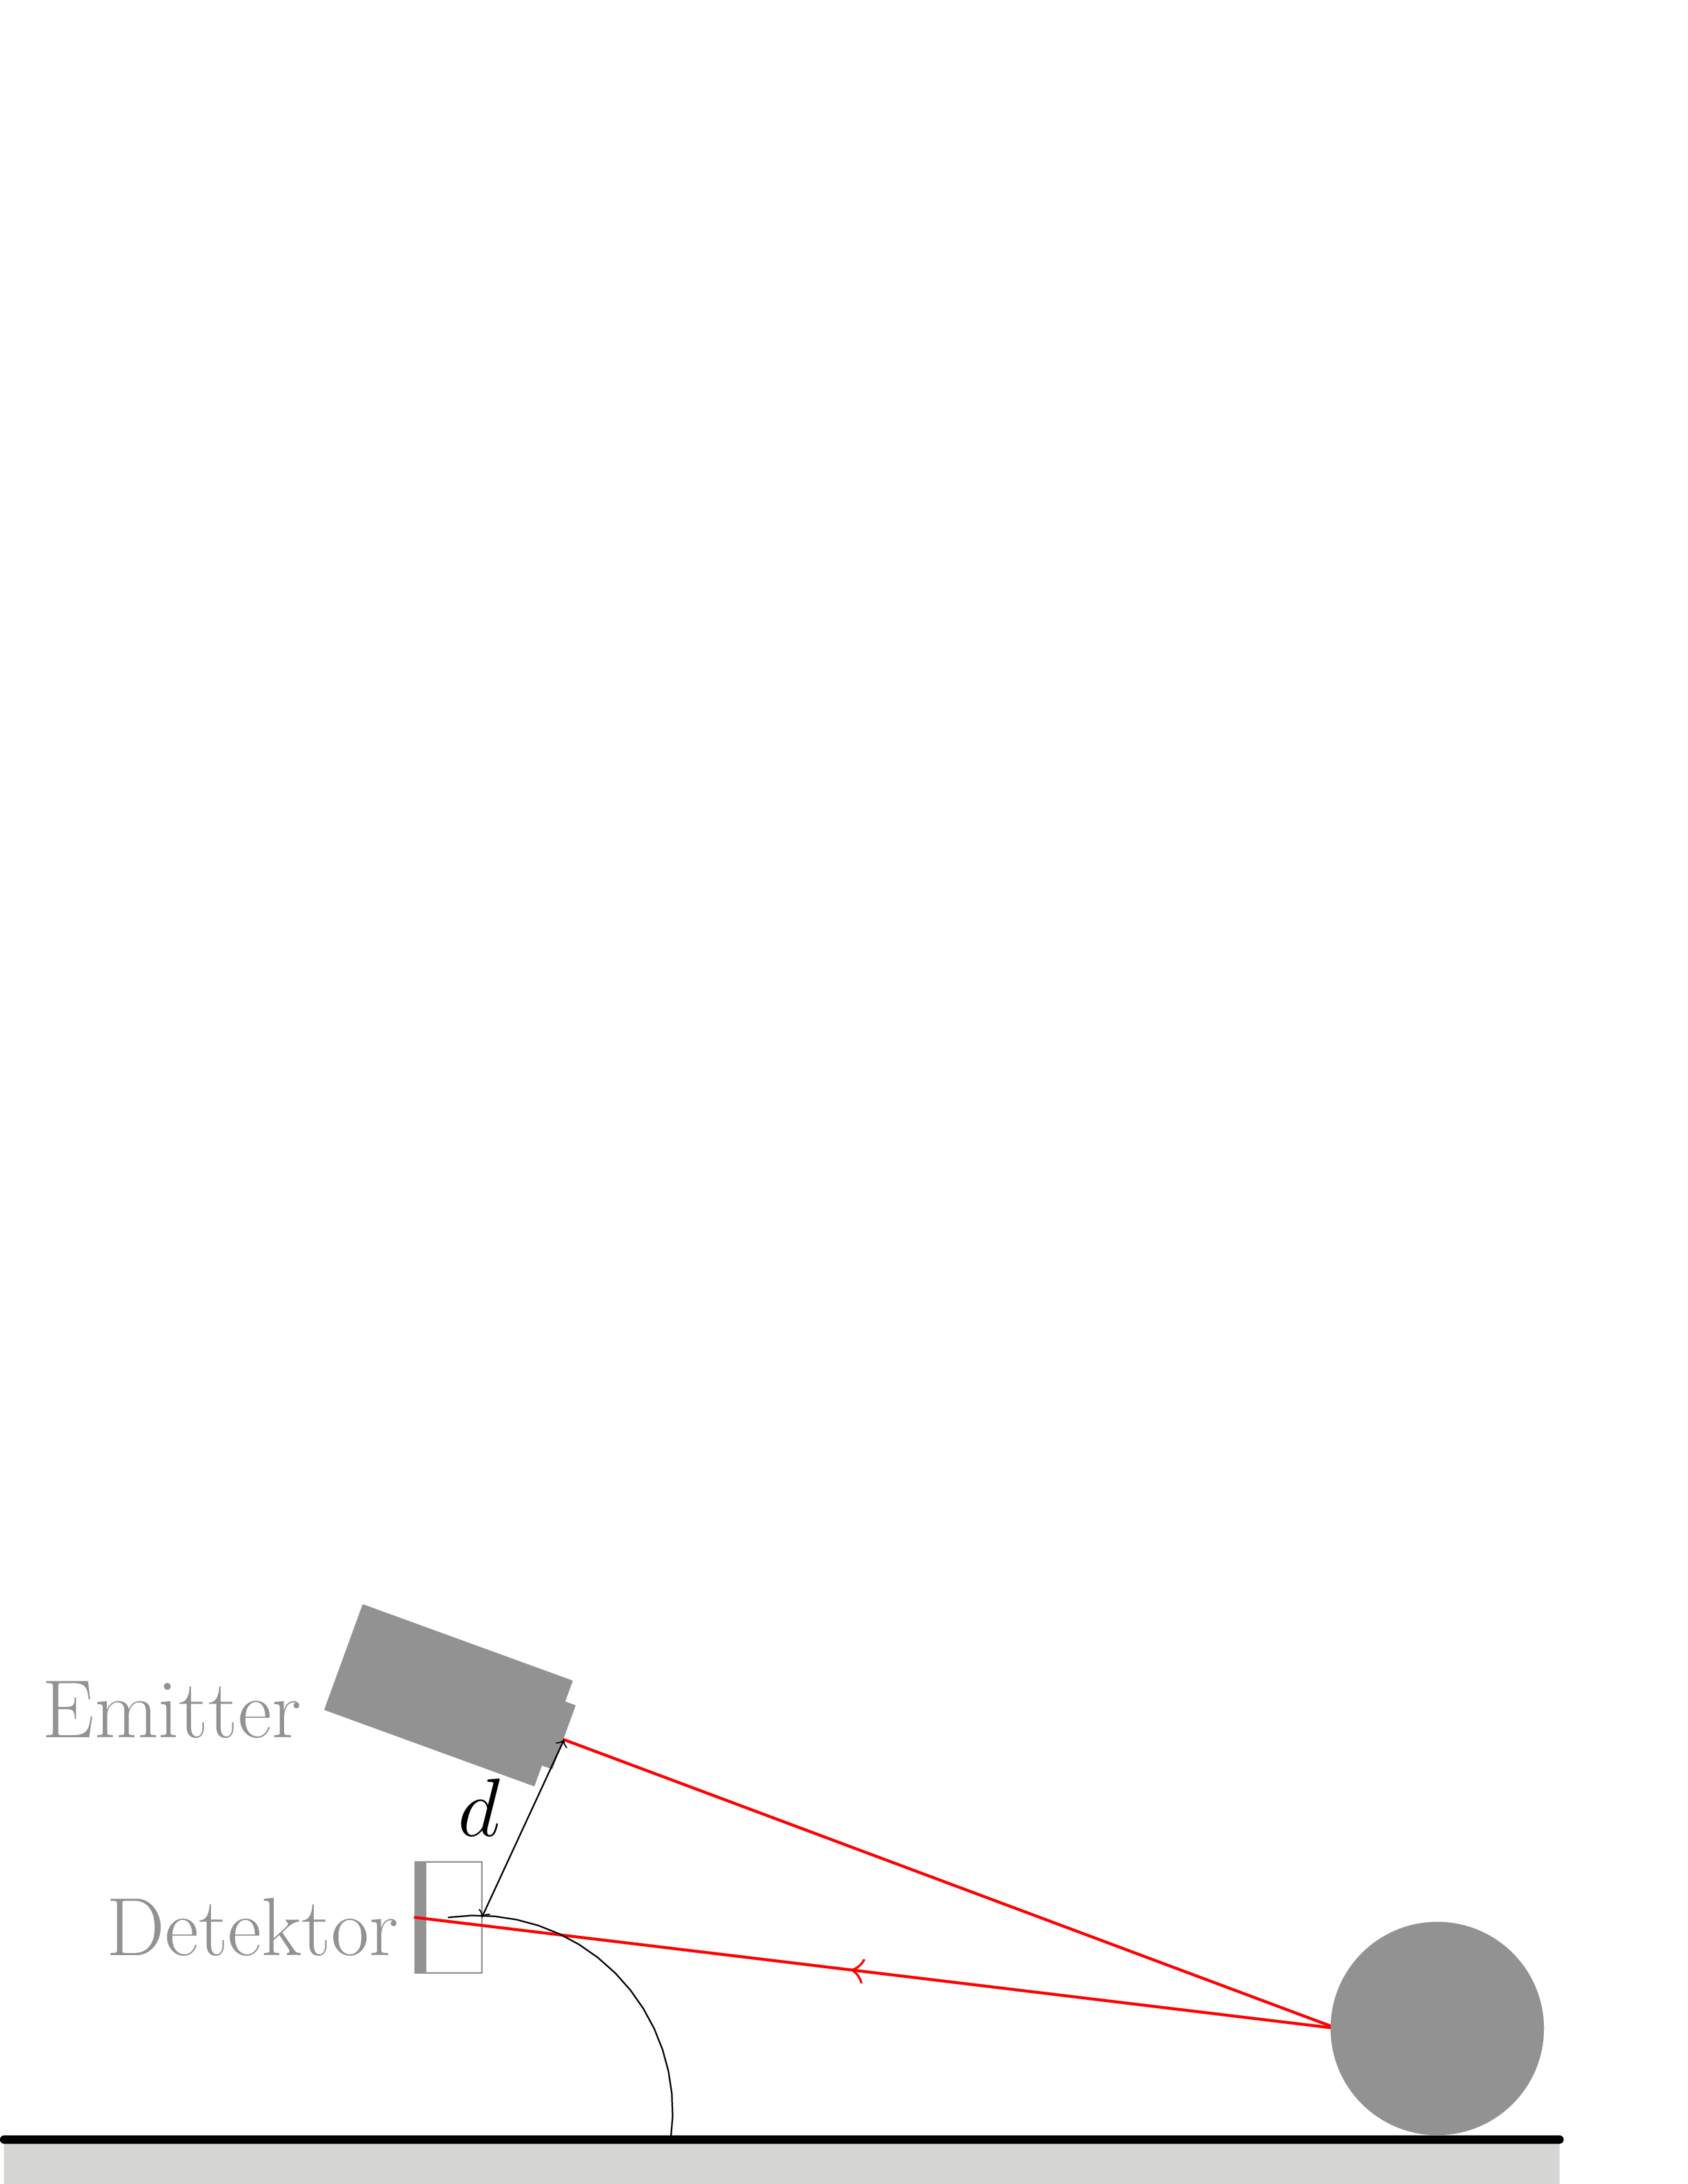

In [20]:
%%asy --root Images/triangulation
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(30));

pair pos_laser = (0,2);
pair pos_detektor = (0,1);

path laser = (-.5,-.25) -- (.5,-.25) -- (.5,-.15) -- (.55,-.15) -- (.55,.15) -- (.5,.15) -- (.5,.25) -- (-.5,.25) --cycle;
draw(shift(pos_laser) * rotate(-20) * laser, L=Label("Emitter", S, align=(-1,0)), .5white);
fill(shift(pos_laser) * rotate(-20) * laser, .5white);
path detektor = box((-.15,-.25),(.15,.25));
fill(shift(pos_detektor) * box((-.15,-.25),(-.1,.25)), .5white);
draw(shift(pos_detektor) * detektor, L=Label("Detektor", S), .5white);

pair p0 = (-.15,1);
pair p1 = (.52,1.8);
pair p2 = (4,.5);

draw(p1 -- p2 -- p0, red+linewidth(1.0pt), arrow=Arrow(TeXHead,Relative(.75)));
draw(shift(pos_detektor) * (.15,0) -- p1, L=Label("$d$"), arrow=Arrows(TeXHead),WNW);

fill(box((-2,0),(5,-.2)),.8white);
draw((-2,0)--(5,0), linewidth(3.0pt));
fill(shift((.45,0)) * shift(p2) * scale(.48) * unitcircle, .5white);

draw(shift(0,1) * rotate(-90) * ((0,0) .. (.25,.75) .. (1,1)));

In [79]:
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

# In-Flight

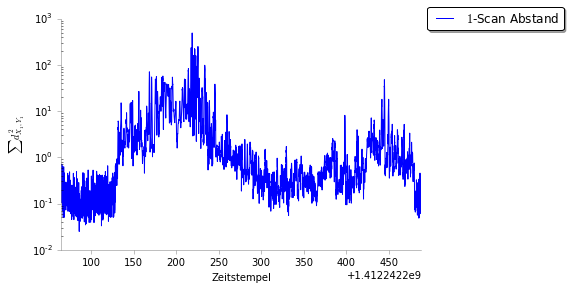

In [80]:
icp_fitness_score_1 = pd.read_csv("Data/In-Flight/icp_fitness_1.csv", delimiter=";", header=0)
plot = icp_fitness_score_1.plot(y='score',x='timestamp_1',logy=True)

plot.set_xlabel("Zeitstempel")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")

plt.tight_layout()
format_axes(plot)

plot.legend(['$1$-Scan Abstand'], loc='center left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.savefig('Graphs/icp_fitness_1.pdf')

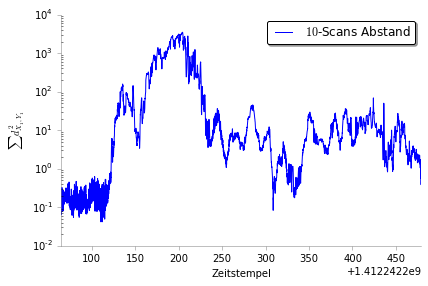

In [81]:
icp_fitness_score_10 = pd.read_csv("Data/In-Flight/icp_fitness_10.csv", delimiter=";", header=0)
plot = icp_fitness_score_10.plot(y='score',x='timestamp_1',logy=True)

plot.set_xlabel("Zeitstempel")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")

plt.tight_layout()
format_axes(plot)

plot.legend(['$10$-Scans Abstand'], loc='left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.savefig('Graphs/icp_fitness_10.pdf')

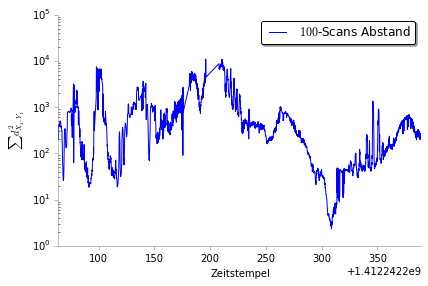

In [82]:
icp_fitness_score_100 = pd.read_csv("Data/In-Flight/icp_fitness_100.csv", delimiter=";", header=0)
plot = icp_fitness_score_100.plot(y='score',x='timestamp_1',logy=True)

plot.set_xlabel("Zeitstempel")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")

plt.tight_layout()
format_axes(plot)

plot.legend(['$100$-Scans Abstand'], loc='left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.savefig('Graphs/icp_fitness_100.pdf')

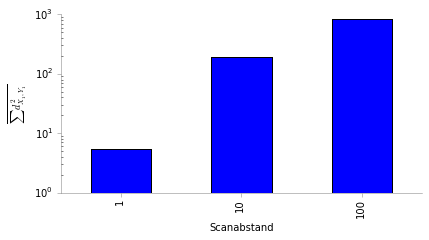

In [83]:
d = {'Scanabstand' : ['1','10','100'],
     'Score' : [icp_fitness_score_1['score'].mean(),icp_fitness_score_10['score'].mean(),icp_fitness_score_100['score'].mean()]}
df = pd.DataFrame(d)
df = df.set_index('Scanabstand')
plot = df.plot(kind='bar',logy=True)
plot.set_ylabel("$\overline{\sum {d_{X_1, Y_1}^2}}$")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['1-Bild','10-Bilder','100-Bilder'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=3, fancybox=True, shadow=True).set_visible(False)
plt.savefig("Graphs/in_flight_vergleich_icp_werte.pdf")

In [84]:
from mpl_toolkits.mplot3d import Axes3D

folder_in = "Data/In-Flight/"
folder_out = "Graphs/"
filename = "itraceRT_1412241971_nav_output"
path = folder_out + filename
movement = pd.read_csv(folder_in + filename + ".log", delim_whitespace=True, header=0)
movement.describe()

x              y              z            lat  \
count  166984.000000  166984.000000  166984.000000  166984.000000   
mean        2.804058      -5.977718      -2.413534       0.821149   
std         7.965899      22.802767       4.506786       0.000001   
min       -19.091356     -88.760798     -17.628904       0.821146   
25%         0.818666      -1.864352      -3.130473       0.821149   
50%         1.227516       0.083444      -2.555664       0.821149   
75%         2.321147       0.638731      -0.521179       0.821149   
max        99.645678      62.995335      64.855826       0.821164   

                 lon            alt             ug             vg  \
count  166984.000000  166984.000000  166984.000000  166984.000000   
mean        0.166121     612.809753       1.046776      -0.767213   
std         0.000005       4.506786       9.473022       7.046358   
min         0.166102     545.540393     -20.036891     -80.346953   
25%         0.166122     610.917399      -0.016464      -0.011575   
50%         0.166122     612.951883       0.000957      -0.001540   
75%         0.166122     613.526692       0.006362       0.002165   
max         0.166137     628.025123      98.972618      14.553773   

                  wg             ub      ...          b_Hx    b_Hy    b_Hz  \
count  166984.000000  166984.000000      ...        166984  166984  166984   
mean        0.496585       1.095218      ...             0       0       0   
std         4.830710      10.805958      ...             0       0       0   
min        -5.280365     -22.975418      ...             0       0       0   
25%        -0.002122      -0.018498      ...             0       0       0   
50%         0.000599      -0.000120      ...             0       0       0   
75%         0.002557       0.004813      ...             0       0       0   
max        66.861636     113.622785      ...             0       0       0   

         b_km  height        time_s        time_ms  gps_week  gps_sec_of_week  \
count  166984  166984  1.669840e+05  166984.000000    166984    166984.000000   
mean        0       0  1.412243e+09  495243.439096      1812    380474.272521   
std         0       0  4.877695e+02  288815.754508         0       487.982736   
min         0       0  1.412242e+09    2669.000000      1812    379635.041250   
25%         0       0  1.412242e+09  242669.000000      1812    380052.498750   
50%         0       0  1.412243e+09  492669.000000      1812    380469.956250   
75%         0       0  1.412243e+09  742669.000000      1812    380893.203750   
max         0       0  1.412244e+09  992669.000000      1812    381332.101250   

           INSStatus  
count  166984.000000  
mean        4.012654  
std         1.740152  
min         2.000000  
25%         3.000000  
50%         3.000000  
75%         7.000000  
max         7.000000  

[8 rows x 37 columns]

In [85]:
translations = movement[['x','y','z']].ix[6000:]
translations = translations.iloc[::10, :]

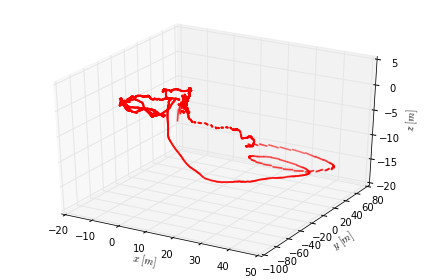

In [86]:
fig = plt.figure().gca(projection='3d')

fig.scatter(translations['x'], translations['y'], translations['z'],s=1,color='red')

fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')
fig.set_zlabel('$z$ $[m]$')

plt.tight_layout()
plt.savefig(path + "_trajectory_3d.pdf")

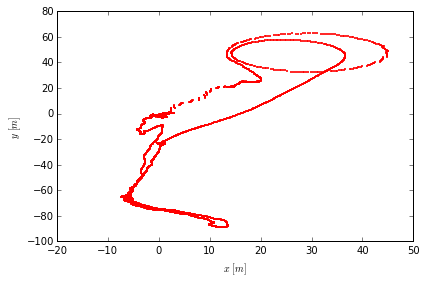

In [87]:
fig = plt.figure().gca()

fig.scatter(translations['x'], translations['y'],s=1,color='red')
fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')

plt.tight_layout()
format_axes(plot)

plt.tight_layout()
plt.savefig(path + "_trajectory_2d.pdf")

# Common-Ground

In [88]:
folder_in = "Data/Common-Ground/"
folder_out = "Graphs/"

In [89]:
#filename = "movement_each_scan"
#filename = "movement_2_between"
filename = "movement_10_between"
#filename = "movement_100_between"

In [90]:
path = folder_out + filename
movement = pd.read_csv(folder_in + filename + ".csv", delimiter=";", header=0)

In [91]:
rotations = movement[['phi_1','theta_1','psi_1','phi_2','theta_2','psi_2','d_phi','d_theta','d_psi']]

In [92]:
translations = movement[['x_1','y_1','z_1','x_2','y_2','z_2','d_x','d_y','d_z']]

## Auswahl der Schlüsselszenen

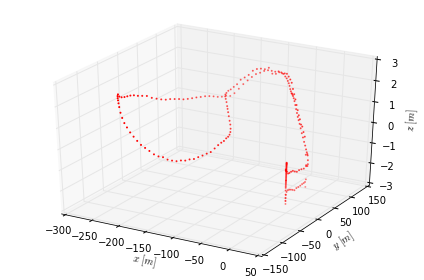

In [93]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure().gca(projection='3d')

fig.scatter(translations['x_1'], translations['y_1'], translations['z_1'],s=1,color='red')

fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')
fig.set_zlabel('$z$ $[m]$')

plt.tight_layout()
plt.savefig(path + "_trajectory_3d.pdf")

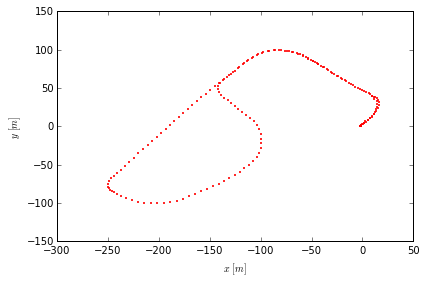

In [94]:
fig = plt.figure().gca()

fig.scatter(translations['x_1'], translations['y_1'],s=1,color='red')
fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')

plt.tight_layout()
format_axes(plot)

plt.tight_layout()
plt.savefig(path + "_trajectory_2d.pdf")

In [95]:
from numpy import *

def getExtrema(data, nr_of_each_extrema):
    minima = getMinima(data, nr_of_each_extrema)
    maxima = getMaxima(data, nr_of_each_extrema)
    return minima + maxima

def getMaxima(data, nr_of_extrema):

    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    maxima = sorted(c, reverse=True)[:nr_of_extrema]
    
    return maxima

def getMinima(data, nr_of_extrema):

    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    minima = sorted(b)[:nr_of_extrema]
    
    return minima

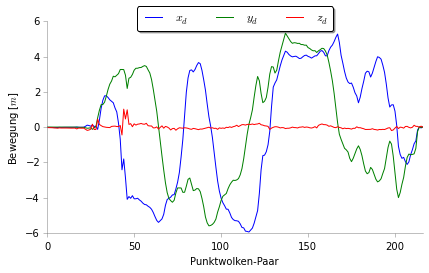

In [96]:
plot = translations[['d_x', 'd_y', 'd_z']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Bewegung [$m$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$x_d$','$y_d$','$z_d$'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_translations.pdf")

maxima:  (array([  6,   8,  14,  17,  20,  23,  26,  38,  40,  43,  48,  51,  56,
        64,  67,  71,  93,  99, 103, 108, 112, 114, 116, 130, 137, 143,
       149, 154, 158, 167, 175, 184, 190, 202, 215]),)
minima:  (array([  7,  10,  15,  18,  21,  25,  27,  39,  41,  44,  49,  52,  61,
        65,  68,  79,  95, 100, 104, 110, 113, 115, 124, 131, 141, 146,
       152, 155, 166, 173, 179, 186, 197, 214]),)


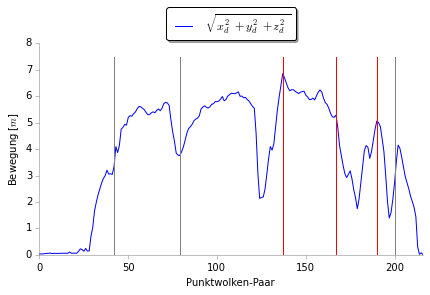

In [97]:
import math

def myfunc():
    for index, row in translations.iterrows():
        d_x = math.pow(row['d_x'], 2)
        d_y = math.pow(row['d_y'], 2)
        d_z = math.pow(row['d_z'], 2)
        yield (math.sqrt(d_x + d_y + d_z))

data = np.fromiter(myfunc(), dtype=float)
    
from scipy.signal import argrelextrema
# for local maxima
print "maxima: ", argrelextrema(data, np.greater)
# for local minima
print "minima: ", argrelextrema(data, np.less)    

df = pd.DataFrame(data, columns=['length'])

plot = df.plot()
plt.plot([42, 42], [0, 7.5], 'gray', lw=1)
plt.plot([79, 79], [0, 7.5], 'gray', lw=1)
plt.plot([137, 137], [0, 7.5], 'red', lw=1)
plt.plot([167, 167], [0, 7.5], 'red', lw=1)
plt.plot([190, 190], [0, 7.5], 'red', lw=1)
plt.plot([200, 200], [0, 7.5], 'gray', lw=1)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Bewegung [$m$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\sqrt{x_d^2 + y_d^2 + z_d^2}$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_translations_length.pdf")

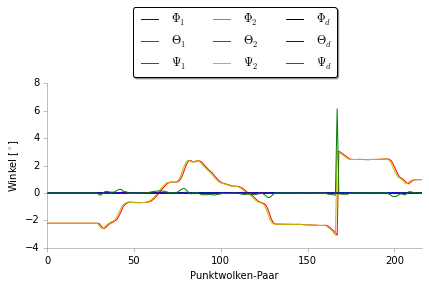

In [98]:
plot = rotations.plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$\Phi_1$','$\Theta_1$','$\Psi_1$','$\Phi_2$','$\Theta_2$','$\Psi_2$','$\Phi_d$','$\Theta_d$','$\Psi_d$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations.pdf")

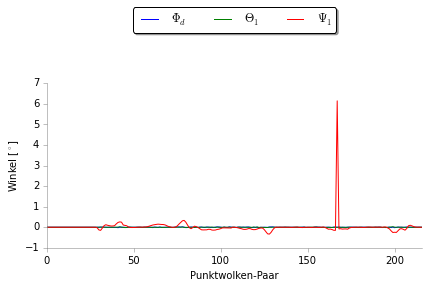

In [99]:
plot = rotations[['d_phi', 'd_theta', 'd_psi']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$\Phi_d$','$\Theta_1$','$\Psi_1$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_delta.pdf")

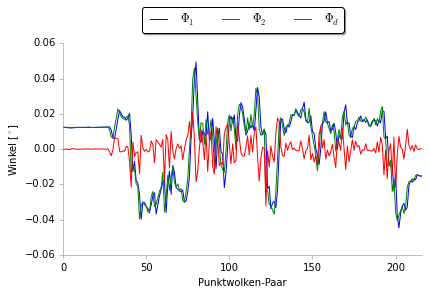

In [100]:
plot = rotations[['phi_1', 'phi_2', 'd_phi']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\Phi_1$','$\Phi_2$','$\Phi_d$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_phi.pdf")

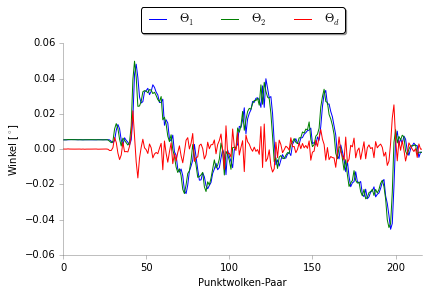

In [101]:
plot = rotations[['theta_1', 'theta_2', 'd_theta']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\Theta_1$','$\Theta_2$','$\Theta_d$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_theta.pdf")

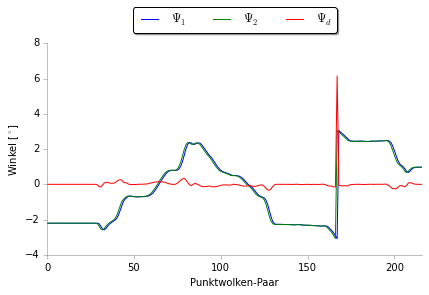

In [102]:
plot = rotations[['psi_1', 'psi_2', 'd_psi']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\Psi_1$','$\Psi_2$','$\Psi_d$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_psi.pdf")

maxima:  (array([  1,   3,   7,  13,  15,  19,  21,  24,  26,  31,  34,  42,  49,
        53,  64,  79,  83,  85,  90,  96, 105, 114, 119, 128, 134, 137,
       141, 144, 147, 152, 155, 158, 162, 167, 170, 173, 179, 182, 185,
       188, 191, 193, 199, 201, 206, 209]),)
minima:  (array([  2,   5,  11,  14,  18,  20,  22,  25,  27,  32,  37,  48,  52,
        54,  73,  82,  84,  87,  93, 102, 107, 116, 124, 133, 135, 139,
       142, 145, 150, 153, 157, 159, 163, 169, 172, 177, 180, 184, 187,
       189, 192, 194, 200, 204, 207]),)


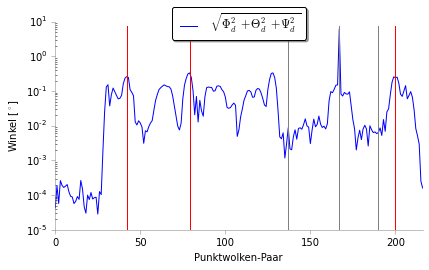

In [103]:
def lengthrot():
    for index, row in rotations.iterrows():
        d_phi = math.pow(row['d_phi'], 2)
        d_theta = math.pow(row['d_theta'], 2)
        d_psi = math.pow(row['d_psi'], 2)
        yield (math.sqrt(d_phi + d_theta + d_psi))

data = np.fromiter(lengthrot(), dtype=float)
    
from scipy.signal import argrelextrema
# for local maxima
print "maxima: ", argrelextrema(data, np.greater)
# for local minima
print "minima: ", argrelextrema(data, np.less)  

df = pd.DataFrame(data, columns=['length'])

plot = df.plot(logy=True)
plt.plot([42, 42], [0, 7.5], 'red', lw=1)
plt.plot([79, 79], [0, 7.5], 'red', lw=1)
plt.plot([137, 137], [0, 7.5], 'gray', lw=1)
plt.plot([167, 167], [0, 7.5], 'gray', lw=1)
plt.plot([190, 190], [0, 7.5], 'gray', lw=1)
plt.plot([200, 200], [0, 7.5], 'red', lw=1)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\sqrt{\Phi_d^2 + \Theta_d^2 + \Psi_d^2}$'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_length.pdf")

## Analyse der Kalibrierung im Sensor-Bezugssystem

### unter korrekter Vorgabe

In [104]:
voxel_name = "korrekte_vorgabe_sensor_voxel_emp"
covariance_name = "korrekte_vorgabe_sensor_covariance_emp"
both_name = "korrekte_vorgabe_sensor_both_emp"
none_name = "korrekte_vorgabe_sensor_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

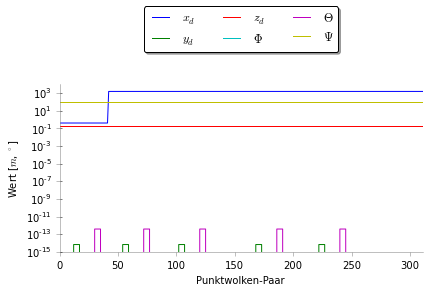

In [105]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

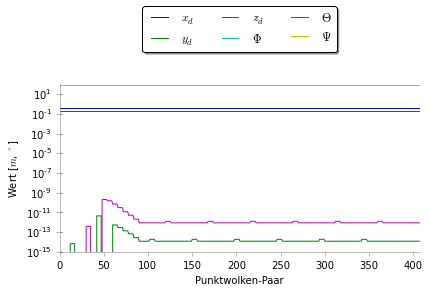

In [106]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

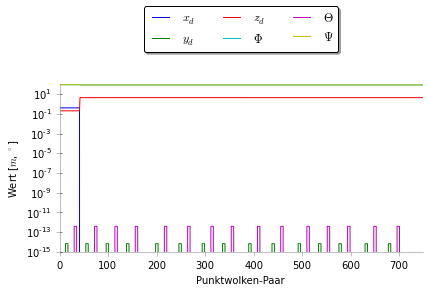

In [107]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

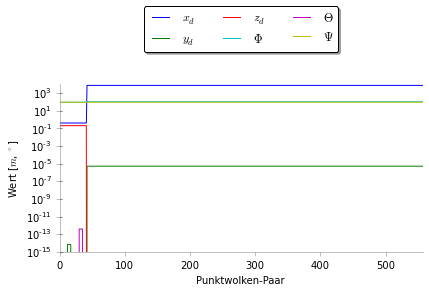

In [108]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [109]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

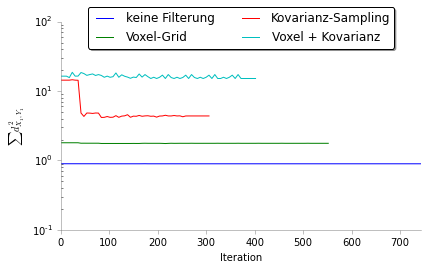

In [110]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_korrekte_pose_score_szene_6.pdf")

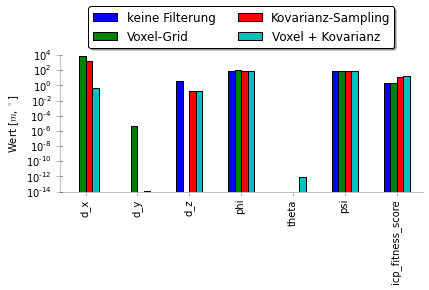

In [111]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_korrekte_pose_loesungsbereiche.pdf")

### unter falscher Vorgabe

In [112]:
voxel_name = "falsche_vorgabe_sensor_voxel_emp"
covariance_name = "falsche_vorgabe_sensor_covariance_emp"
both_name = "falsche_vorgabe_sensor_both_emp"
none_name = "falsche_vorgabe_sensor_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

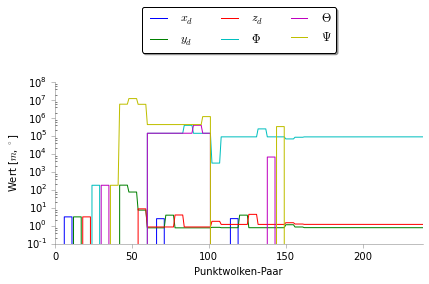

In [113]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

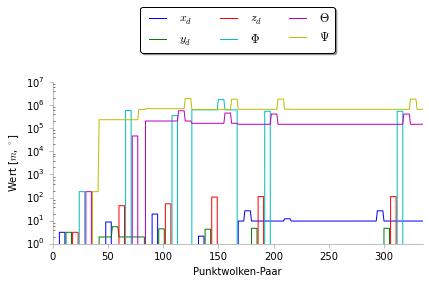

In [114]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

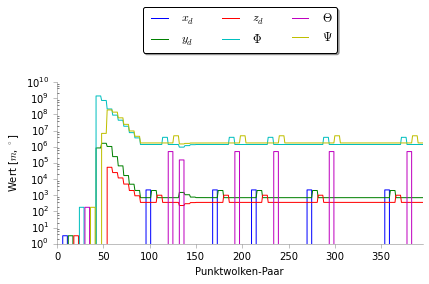

In [115]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

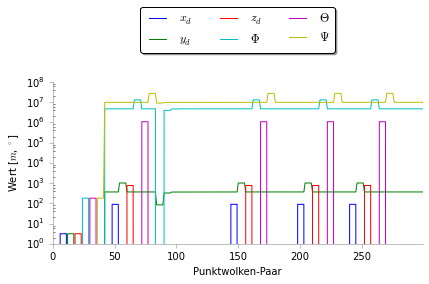

In [116]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [117]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

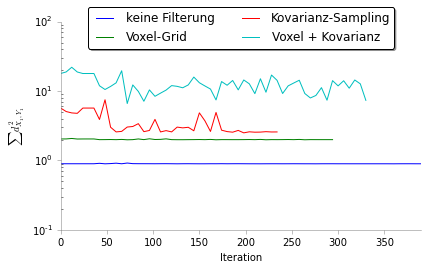

In [118]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_falsche_pose_score_szene_6.pdf")

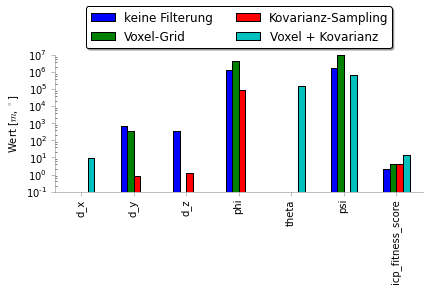

In [119]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_falsche_pose_loesungsbereiche.pdf")

## Analyse der Kalibrierung im Welt-Bezugssystem

### unter korrekter Vorgabe

In [120]:
voxel_name = "korrekte_vorgabe_welt_voxel_emp"
covariance_name = "korrekte_vorgabe_welt_covariance_emp"
both_name = "korrekte_vorgabe_welt_both_emp"
none_name = "korrekte_vorgabe_welt_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

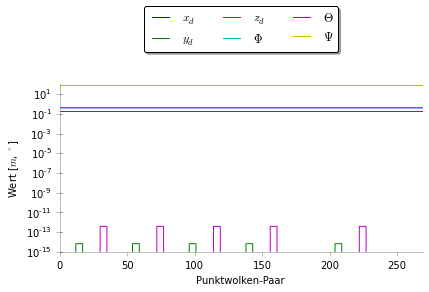

In [121]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

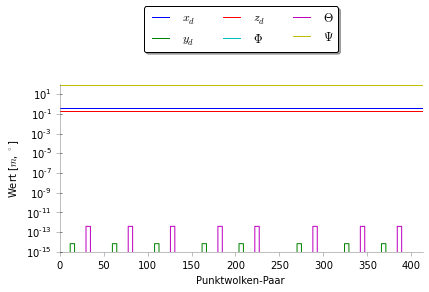

In [122]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

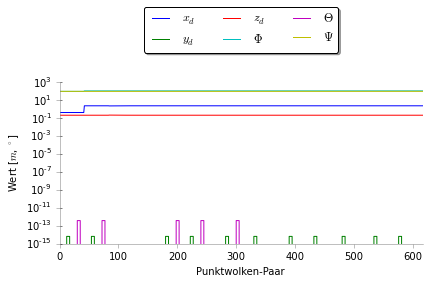

In [123]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

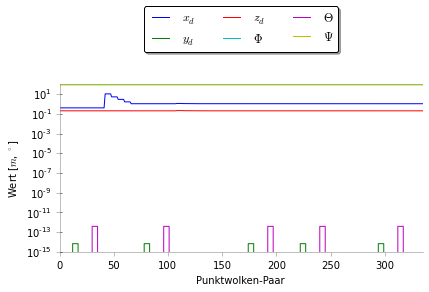

In [124]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [125]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

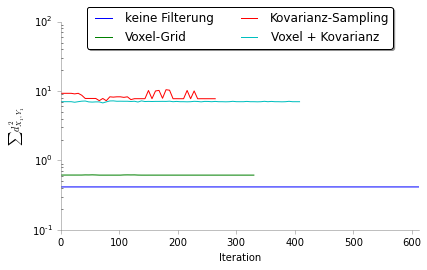

In [126]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_korrekte_pose_score_szene_6.pdf")

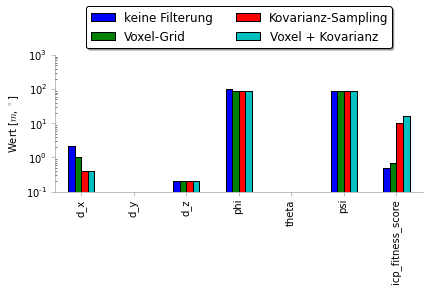

In [127]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_korrekte_pose_loesungsbereiche.pdf")

### unter falscher Vorgabe

In [128]:
voxel_name = "falsche_vorgabe_welt_voxel_emp"
covariance_name = "falsche_vorgabe_welt_covariance_emp"
both_name = "falsche_vorgabe_welt_both_emp"
none_name = "falsche_vorgabe_welt_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

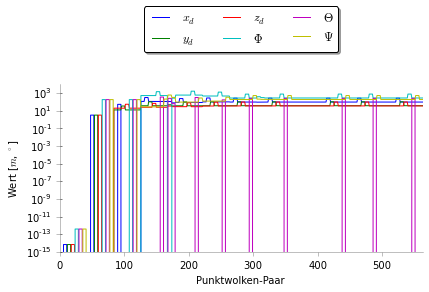

In [129]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

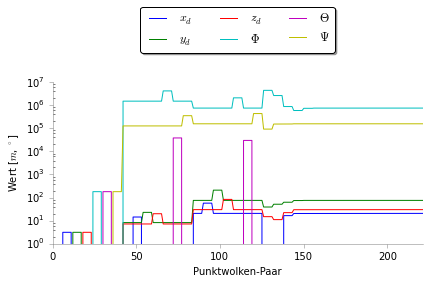

In [130]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

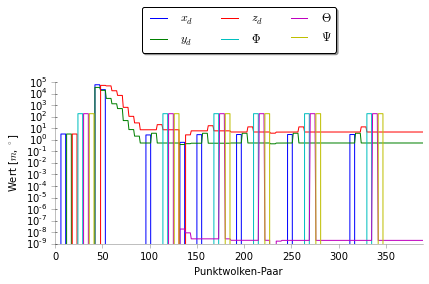

In [131]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

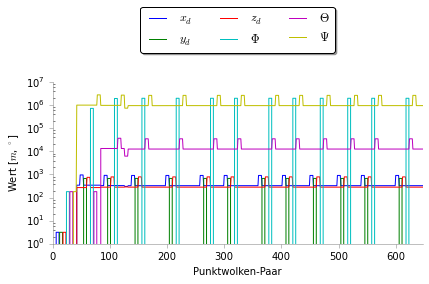

In [132]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [133]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

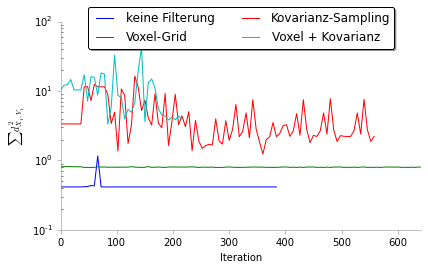

In [134]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_falsche_pose_score_szene_6.pdf")

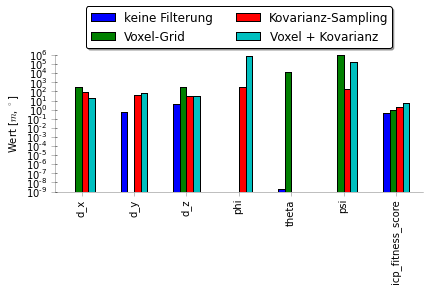

In [135]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_falsche_pose_loesungsbereiche.pdf")